In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install dotmap
!pip install osmnx==1.1.2
!pip install simpy
!pip install ExMAS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 15.1 MB/s eta 0:00:00
  Attempting uninstal

In [4]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [ ]:
# !wget -P /content/drive/MyDrive/maassim_project/MaaSSim-Coevolution/data/graphs/ https://f4wiya.db.files.1drv.com/y4m5s7z6hnYMENSGTagbhpfIMlI3cO51wEA23xzVH6OS5sVCrEXg68lMT_ic6WEdDtPtDDU0rhlFpAoLEztmx8RZe6_vVJkI_CWKnvhYqPExM4zVFQcytoa8osIB2CgLt1nIF2Ot1pIIGg0Nc9xiBVQ0g9L6VrDdmoLaKJIUKxQ34pU89KvY4ncSz9_QsgBABk52aJmGdyYIax57VOA_pGjkQ 

In [5]:
%cd /content/drive/MyDrive/maassim_project/MaaSSim-Coevolution/docs/Coevolution_Experiments/

/content/drive/MyDrive/maassim_project/MaaSSim-Coevolution/docs/Coevolution_Experiments


In [6]:
%pwd

'/content/drive/MyDrive/maassim_project/MaaSSim-Coevolution/docs/Coevolution_Experiments'

In [7]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim
module_path
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)

params.d2d.learning_d = 5 # 1 for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 7 # 5 for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 1000 # 2000
params.nV = 100  # 200
params.nD = 800
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro


In [8]:
sim_alter_tune = MaaSSim.simulators.simulate_tune4(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING,file_res='../../rl_results/rl_revs_single_tune4_0.05_0010_1000100.txt',stp=0.05,initial_comm_rate=0.5)


This simulation uses albatros data


/content/drive/MyDrive/maassim_project/MaaSSim-Coevolution/MaaSSim/utils.py:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(index=df.columns, name=name)


stp is:  0.05
type(stp):  <class 'float'>
initial comm rate:  0.5
type(comm_rate):  <class 'numpy.float64'>
--------> iter: 0 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[0 0]]


2,0.5,0.0 state:[[0 0]]
--------> iter: 1 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[0 0]]


0,0.55,8.1906 state:[[0 0]]
--------> iter: 2 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[2 0]]


0,0.6,42.9888 state:[[2 0]]
--------> iter: 3 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[7 1]]


0,0.65,67.2152 state:[[7 1]]
--------> iter: 4 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[7 0]]


1,0.6,79.9416 state:[[7 0]]
--------> iter: 5 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[12  2]]


1,0.55,146.6443 state:[[12  2]]
--------> iter: 6 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[23  2]]


2,0.55,193.24360000000001 state:[[23  2]]
--------> iter: 7 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[28  2]]


2,0.55,150.799 state:[[28  2]]
--------> iter: 8 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[23  5]]


1,0.5,145.043 state:[[23  5]]
--------> iter: 9 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[26  3]]


1,0.45,89.5329 state:[[26  3]]
--------> iter: 10 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[20  2]]


2,0.45,152.66879999999998 state:[[20  2]]
--------> iter: 11 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[27  4]]


0,0.5,148.352 state:[[27  4]]
--------> iter: 12 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[30  4]]


1,0.45,162.5652 state:[[30  4]]
--------> iter: 13 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[34  0]]


1,0.4,138.004 state:[[34  0]]
--------> iter: 14 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[27  2]]


2,0.4,116.28960000000001 state:[[27  2]]
--------> iter: 15 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[28  1]]


0,0.45,204.88049999999998 state:[[28  1]]
--------> iter: 16 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[37  5]]


1,0.4,187.61200000000002 state:[[37  5]]
--------> iter: 17 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[42  4]]


0,0.45,149.0463 state:[[42  4]]
--------> iter: 18 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[27  4]]


1,0.4,144.6544 state:[[27  4]]
--------> iter: 19 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[32  3]]


2,0.4,162.53520000000003 state:[[32  3]]
--------> iter: 20 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[31  7]]


2,0.4,117.7536 state:[[31  7]]
--------> iter: 21 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[28  1]]


0,0.45,142.57260000000002 state:[[28  1]]
--------> iter: 22 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[28  3]]


1,0.4,148.56240000000003 state:[[28  3]]
--------> iter: 23 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[31  4]]


2,0.4,178.3904 state:[[31  4]]
--------> iter: 24 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[41  2]]


0,0.45,144.2052 state:[[41  2]]
--------> iter: 25 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[29  3]]


0,0.5,28.652399999999993 state:[[29  3]]
--------> iter: 26 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[24  3]]


0,0.55,39.7278 state:[[24  3]]
--------> iter: 27 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[26  2]]


1,0.5,32.568 state:[[26  2]]
--------> iter: 28 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[29  4]]


0,0.55,57.646800000000006 state:[[29  4]]
--------> iter: 29 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[34  5]]


2,0.55,51.775200000000005 state:[[34  5]]
--------> iter: 30 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[32  3]]


2,0.55,55.93260000000001 state:[[32  3]]
--------> iter: 31 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[35  2]]


1,0.5,43.03699999999999 state:[[35  2]]
--------> iter: 32 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[36  5]]


0,0.55,55.161 state:[[36  5]]
--------> iter: 33 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[33  5]]


2,0.55,43.581900000000005 state:[[33  5]]
--------> iter: 34 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[28  3]]


2,0.55,66.01230000000001 state:[[28  3]]
--------> iter: 35 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[38  2]]


1,0.5,47.07719999999999 state:[[38  2]]
--------> iter: 36 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[40  1]]


2,0.5,40.05959999999999 state:[[40  1]]
--------> iter: 37 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[30  4]]


0,0.55,62.79910000000001 state:[[30  4]]
--------> iter: 38 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[33  5]]


2,0.55,60.5938 state:[[33  5]]
--------> iter: 39 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[38  4]]


0,0.6,95.09399999999998 state:[[38  4]]
--------> iter: 40 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[35  3]]


2,0.6,72.012 state:[[35  3]]
--------> iter: 41 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[28  6]]


2,0.6,111.57959999999997 state:[[28  6]]
--------> iter: 42 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[42  4]]


0,0.65,138.8596 state:[[42  4]]
--------> iter: 43 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[40  3]]


0,0.7,153.39479999999998 state:[[40  3]]
--------> iter: 44 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[46  8]]


2,0.7,159.03339999999997 state:[[46  8]]
--------> iter: 45 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[41  2]]


1,0.65,99.843 state:[[41  2]]
--------> iter: 46 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[36  2]]


1,0.6,74.52039999999998 state:[[36  2]]
--------> iter: 47 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[33  6]]


2,0.6,113.96799999999998 state:[[33  6]]
--------> iter: 48 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[46  1]]


2,0.6,72.80599999999998 state:[[46  1]]
--------> iter: 49 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[31  6]]


0,0.65,111.98949999999999 state:[[31  6]]
--------> iter: 50 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[43  3]]


1,0.6,94.44439999999997 state:[[43  3]]
--------> iter: 51 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[44  2]]


1,0.55,80.85920000000002 state:[[44  2]]
--------> iter: 52 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[46  4]]


1,0.5,60.82439999999999 state:[[46  4]]
--------> iter: 53 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[42  2]]


1,0.45,30.7016 state:[[42  2]]
--------> iter: 54 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[37  4]]


2,0.45,18.071299999999994 state:[[37  4]]
--------> iter: 55 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[31  3]]


1,0.4,8.9168 state:[[31  3]]
--------> iter: 56 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[41  4]]


0,0.45,42.523399999999995 state:[[41  4]]
--------> iter: 57 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[35  5]]


1,0.4,12.3736 state:[[35  5]]
--------> iter: 58 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[43  3]]


0,0.45,23.301199999999994 state:[[43  3]]
--------> iter: 59 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[34  6]]


0,0.5,61.82059999999999 state:[[34  6]]
--------> iter: 60 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[38  4]]


0,0.55,43.20720000000001 state:[[38  4]]
--------> iter: 61 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[25  2]]


1,0.5,59.17279999999998 state:[[25  2]]
--------> iter: 62 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[45  5]]


1,0.45,24.369699999999998 state:[[45  5]]
--------> iter: 63 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[38  3]]


1,0.4,9.1336 state:[[38  3]]
--------> iter: 64 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[39  5]]


2,0.4,20.9096 state:[[39  5]]
--------> iter: 65 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[37  3]]


1,0.35,-12.512100000000018 state:[[37  3]]
--------> iter: 66 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[33  4]]


0,0.4,15.260000000000002 state:[[33  4]]
--------> iter: 67 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[36  4]]


2,0.4,12.401600000000002 state:[[36  4]]
--------> iter: 68 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[39  4]]


2,0.4,16.454400000000003 state:[[39  4]]
--------> iter: 69 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[34  4]]


0,0.45,35.969199999999994 state:[[34  4]]
--------> iter: 70 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[40  7]]


2,0.45,46.3639 state:[[40  7]]
--------> iter: 71 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[46  0]]


0,0.5,49.69799999999999 state:[[46  0]]
--------> iter: 72 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[40  4]]


1,0.45,16.007899999999996 state:[[40  4]]
--------> iter: 73 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[33  4]]


2,0.45,28.795699999999997 state:[[33  4]]
--------> iter: 74 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[36  2]]


0,0.5,47.58039999999998 state:[[36  2]]
--------> iter: 75 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[43  2]]


0,0.55,68.30270000000002 state:[[43  2]]
--------> iter: 76 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[36  1]]


0,0.6,104.34399999999997 state:[[36  1]]
--------> iter: 77 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[45  6]]


1,0.55,54.28980000000001 state:[[45  6]]
--------> iter: 78 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[35  3]]


1,0.5,68.05419999999998 state:[[35  3]]
--------> iter: 79 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[55  0]]


0,0.55,56.15520000000001 state:[[55  0]]
--------> iter: 80 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[34  1]]


0,0.6,89.82279999999999 state:[[34  1]]
--------> iter: 81 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[38  4]]


0,0.65,119.791 state:[[38  4]]
--------> iter: 82 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[41  1]]


0,0.7,125.36939999999997 state:[[41  1]]
--------> iter: 83 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[39  2]]


0,0.75,134.63819999999998 state:[[39  2]]
--------> iter: 84 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[36  3]]


1,0.7,96.36299999999997 state:[[36  3]]
--------> iter: 85 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[33  3]]


2,0.7,165.93419999999998 state:[[33  3]]
--------> iter: 86 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[41  1]]


0,0.75,130.123 state:[[41  1]]
--------> iter: 87 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[32  4]]


1,0.7,113.02219999999998 state:[[32  4]]
--------> iter: 88 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[36  5]]


0,0.75,133.76919999999998 state:[[36  5]]
--------> iter: 89 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[37  4]]


2,0.75,182.5027 state:[[37  4]]
--------> iter: 90 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[42  4]]


0,0.8,171.4112 state:[[42  4]]
--------> iter: 91 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[40  1]]


0,0.85,158.34329999999997 state:[[40  1]]
--------> iter: 92 of 800 <--------
action:  2 comm_rate:  0.85
new comm_rate:  0.85
current state:  [[30  3]]


2,0.85,161.8553 state:[[30  3]]
--------> iter: 93 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[34  3]]


1,0.8,210.6296 state:[[34  3]]
--------> iter: 94 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[50  3]]


2,0.8,122.57280000000002 state:[[50  3]]
--------> iter: 95 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[31  1]]


0,0.85,183.86659999999998 state:[[31  1]]
--------> iter: 96 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[40  6]]


1,0.8,165.972 state:[[40  6]]
--------> iter: 97 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[35  3]]


1,0.75,135.2729 state:[[35  3]]
--------> iter: 98 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[35  4]]


1,0.7,133.34759999999997 state:[[35  4]]
--------> iter: 99 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[36  5]]


2,0.7,154.45919999999998 state:[[36  5]]
--------> iter: 100 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[47  4]]


1,0.65,285.3552 state:[[47  4]]
--------> iter: 101 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[38  2]]


2,0.65,293.1227 state:[[38  2]]
--------> iter: 102 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[41  7]]


1,0.6,269.4936 state:[[41  7]]
--------> iter: 103 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[41  4]]


1,0.55,230.6216 state:[[41  4]]
--------> iter: 104 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[36  2]]


1,0.5,204.38299999999998 state:[[36  2]]
--------> iter: 105 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[40  3]]


0,0.55,188.39810000000003 state:[[40  3]]
--------> iter: 106 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[32  5]]


0,0.6,210.5076 state:[[32  5]]
--------> iter: 107 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  2]]


1,0.55,190.39900000000003 state:[[30  2]]
--------> iter: 108 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[33  5]]


1,0.5,230.242 state:[[33  5]]
--------> iter: 109 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[43  1]]


0,0.55,195.79340000000002 state:[[43  1]]
--------> iter: 110 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[32  5]]


2,0.55,209.93940000000003 state:[[32  5]]
--------> iter: 111 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[33  3]]


0,0.6,265.0032 state:[[33  3]]
--------> iter: 112 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[39  2]]


1,0.55,183.2215 state:[[39  2]]
--------> iter: 113 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[29  2]]


1,0.5,175.88 state:[[29  2]]
--------> iter: 114 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[33  5]]


1,0.45,159.8787 state:[[33  5]]
--------> iter: 115 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[33  3]]


0,0.5,164.654 state:[[33  3]]
--------> iter: 116 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[34  1]]


1,0.45,134.8803 state:[[34  1]]
--------> iter: 117 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[29  3]]


0,0.5,152.665 state:[[29  3]]
--------> iter: 118 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[25  6]]


0,0.55,177.74130000000002 state:[[25  6]]
--------> iter: 119 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[32  2]]


1,0.5,271.015 state:[[32  2]]
--------> iter: 120 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[41  3]]


1,0.45,142.71300000000002 state:[[41  3]]
--------> iter: 121 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  3]]


2,0.45,118.76760000000002 state:[[28  3]]
--------> iter: 122 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[24  3]]


0,0.5,151.559 state:[[24  3]]
--------> iter: 123 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[29  2]]


0,0.55,226.1083 state:[[29  2]]
--------> iter: 124 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[35  5]]


1,0.5,162.09500000000003 state:[[35  5]]
--------> iter: 125 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[31  3]]


1,0.45,184.2129 state:[[31  3]]
--------> iter: 126 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[36  4]]


0,0.5,201.26 state:[[36  4]]
--------> iter: 127 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[37  3]]


2,0.5,146.81 state:[[37  3]]
--------> iter: 128 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[26  4]]


1,0.45,198.5598 state:[[26  4]]
--------> iter: 129 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[38  4]]


0,0.5,195.49900000000002 state:[[38  4]]
--------> iter: 130 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[34  2]]


0,0.55,232.95800000000003 state:[[34  2]]
--------> iter: 131 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[38  1]]


0,0.6,254.48879999999997 state:[[38  1]]
--------> iter: 132 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[41  5]]


1,0.55,202.97970000000004 state:[[41  5]]
--------> iter: 133 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[35  2]]


2,0.55,230.1354 state:[[35  2]]
--------> iter: 134 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[35  3]]


2,0.55,237.46800000000002 state:[[35  3]]
--------> iter: 135 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[39  3]]


2,0.55,235.46600000000004 state:[[39  3]]
--------> iter: 136 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[40  2]]


1,0.5,183.687 state:[[40  2]]
--------> iter: 137 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[32  2]]


2,0.5,157.423 state:[[32  2]]
--------> iter: 138 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[30  4]]


0,0.55,192.2536 state:[[30  4]]
--------> iter: 139 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[31  6]]


1,0.5,191.249 state:[[31  6]]
--------> iter: 140 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[37  4]]


2,0.5,151.413 state:[[37  4]]
--------> iter: 141 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[28  4]]


2,0.5,123.82400000000001 state:[[28  4]]
--------> iter: 142 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[23  6]]


1,0.45,132.61769999999999 state:[[23  6]]
--------> iter: 143 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[32  2]]


0,0.5,107.411 state:[[32  2]]
--------> iter: 144 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[20  5]]


0,0.55,166.54880000000003 state:[[20  5]]
--------> iter: 145 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[25  2]]


2,0.55,183.139 state:[[25  2]]
--------> iter: 146 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[29  3]]


2,0.55,161.36560000000003 state:[[29  3]]
--------> iter: 147 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[24  9]]


2,0.55,256.4166 state:[[24  9]]
--------> iter: 148 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[41  3]]


0,0.6,174.312 state:[[41  3]]
--------> iter: 149 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[28  2]]


0,0.65,272.3266 state:[[28  2]]
--------> iter: 150 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[36  2]]


0,0.7,325.83459999999997 state:[[36  2]]
--------> iter: 151 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[45  2]]


1,0.65,239.9917 state:[[45  2]]
--------> iter: 152 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[35  5]]


0,0.7,211.39579999999998 state:[[35  5]]
--------> iter: 153 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[28  0]]


1,0.65,229.2862 state:[[28  0]]
--------> iter: 154 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[33  4]]


2,0.65,228.2631 state:[[33  4]]
--------> iter: 155 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[35  2]]


2,0.65,214.812 state:[[35  2]]
--------> iter: 156 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[24  3]]


1,0.6,170.4756 state:[[24  3]]
--------> iter: 157 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[25  2]]


1,0.55,171.8145 state:[[25  2]]
--------> iter: 158 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[25  4]]


0,0.6,194.4696 state:[[25  4]]
--------> iter: 159 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[28  1]]


1,0.55,214.23160000000001 state:[[28  1]]
--------> iter: 160 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[37  1]]


2,0.55,154.5918 state:[[37  1]]
--------> iter: 161 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[28  5]]


1,0.5,188.492 state:[[28  5]]
--------> iter: 162 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[30  3]]


2,0.5,163.35399999999998 state:[[30  3]]
--------> iter: 163 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[33  6]]


2,0.5,196.857 state:[[33  6]]
--------> iter: 164 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[30  5]]


2,0.5,181.748 state:[[30  5]]
--------> iter: 165 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[37  4]]


2,0.5,176.79700000000003 state:[[37  4]]
--------> iter: 166 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[31  8]]


0,0.55,169.2185 state:[[31  8]]
--------> iter: 167 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[26  6]]


2,0.55,247.3306 state:[[26  6]]
--------> iter: 168 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[39  4]]


0,0.6,296.85839999999996 state:[[39  4]]
--------> iter: 169 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[38  3]]


1,0.55,196.39180000000002 state:[[38  3]]
--------> iter: 170 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[33  3]]


1,0.5,223.74199999999996 state:[[33  3]]
--------> iter: 171 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[37  4]]


2,0.5,152.611 state:[[37  4]]
--------> iter: 172 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[30  3]]


2,0.5,170.174 state:[[30  3]]
--------> iter: 173 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[33  4]]


0,0.55,193.8376 state:[[33  4]]
--------> iter: 174 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  2]]


0,0.6,220.596 state:[[31  2]]
--------> iter: 175 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[33  5]]


0,0.65,218.9499 state:[[33  5]]
--------> iter: 176 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[28  3]]


1,0.6,283.80959999999993 state:[[28  3]]
--------> iter: 177 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[41  1]]


1,0.55,232.24740000000003 state:[[41  1]]
--------> iter: 178 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[35  3]]


0,0.6,262.8156 state:[[35  3]]
--------> iter: 179 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[40  2]]


0,0.65,221.6942 state:[[40  2]]
--------> iter: 180 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  1]]


1,0.6,225.9756 state:[[31  1]]
--------> iter: 181 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[34  4]]


0,0.65,173.23669999999998 state:[[34  4]]
--------> iter: 182 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[28  5]]


0,0.7,178.5588 state:[[28  5]]
--------> iter: 183 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[25  7]]


2,0.7,263.158 state:[[25  7]]
--------> iter: 184 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[32  5]]


1,0.65,168.4631 state:[[32  5]]
--------> iter: 185 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[25  3]]


0,0.7,306.53839999999997 state:[[25  3]]
--------> iter: 186 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[37  3]]


0,0.75,297.4035 state:[[37  3]]
--------> iter: 187 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[37  3]]


0,0.8,271.8992 state:[[37  3]]
--------> iter: 188 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[29  6]]


2,0.8,296.4176 state:[[29  6]]
--------> iter: 189 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[36  4]]


0,0.85,274.0145 state:[[36  4]]
--------> iter: 190 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[28  2]]


1,0.8,274.9072 state:[[28  2]]
--------> iter: 191 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[33  4]]


0,0.85,366.9008 state:[[33  4]]
--------> iter: 192 of 800 <--------
action:  0 comm_rate:  0.85
new comm_rate:  0.9
current state:  [[38  2]]


0,0.9,271.5318 state:[[38  2]]
--------> iter: 193 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[28  3]]


2,0.9,237.54060000000004 state:[[28  3]]
--------> iter: 194 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[26  6]]


2,0.9,451.09800000000007 state:[[26  6]]
--------> iter: 195 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[48  2]]


2,0.9,289.08900000000006 state:[[48  2]]
--------> iter: 196 of 800 <--------
action:  0 comm_rate:  0.9
new comm_rate:  0.95
current state:  [[31  1]]


0,0.95,347.9375 state:[[31  1]]
--------> iter: 197 of 800 <--------
action:  1 comm_rate:  0.95
new comm_rate:  0.9
current state:  [[32  6]]


1,0.9,493.3872 state:[[32  6]]
--------> iter: 198 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[47  5]]


2,0.9,357.3936 state:[[47  5]]
--------> iter: 199 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[37  3]]


2,0.9,400.33260000000007 state:[[37  3]]
--------> iter: 200 of 800 <--------
action:  1 comm_rate:  0.9
new comm_rate:  0.85
current state:  [[39  2]]


1,0.85,357.0323 state:[[39  2]]
--------> iter: 201 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[34  3]]


1,0.8,207.9008 state:[[34  3]]
--------> iter: 202 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[28  2]]


0,0.85,355.59749999999997 state:[[28  2]]
--------> iter: 203 of 800 <--------
action:  2 comm_rate:  0.85
new comm_rate:  0.85
current state:  [[44  4]]


2,0.85,234.09169999999997 state:[[44  4]]
--------> iter: 204 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[24  4]]


1,0.8,369.47040000000004 state:[[24  4]]
--------> iter: 205 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[46  6]]


1,0.75,346.47299999999996 state:[[46  6]]
--------> iter: 206 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[37  6]]


2,0.75,263.7 state:[[37  6]]
--------> iter: 207 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[31  2]]


0,0.8,256.7328 state:[[31  2]]
--------> iter: 208 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[27  2]]


2,0.8,288.0896 state:[[27  2]]
--------> iter: 209 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[32  2]]


1,0.75,206.2395 state:[[32  2]]
--------> iter: 210 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[22  4]]


0,0.8,329.0496 state:[[22  4]]
--------> iter: 211 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[34  5]]


1,0.75,243.0855 state:[[34  5]]
--------> iter: 212 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[31  5]]


1,0.7,255.3208 state:[[31  5]]
--------> iter: 213 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[31  4]]


1,0.65,209.80700000000002 state:[[31  4]]
--------> iter: 214 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[30  3]]


0,0.7,268.32539999999995 state:[[30  3]]
--------> iter: 215 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[33  1]]


1,0.65,240.23610000000002 state:[[33  1]]
--------> iter: 216 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[30  5]]


1,0.6,264.82439999999997 state:[[30  5]]
--------> iter: 217 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[34  1]]


1,0.55,133.5851 state:[[34  1]]
--------> iter: 218 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[21  3]]


2,0.55,200.3265 state:[[21  3]]
--------> iter: 219 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[32  5]]


1,0.5,254.02100000000002 state:[[32  5]]
--------> iter: 220 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[37  1]]


2,0.5,196.094 state:[[37  1]]
--------> iter: 221 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[34  4]]


2,0.5,191.38099999999997 state:[[34  4]]
--------> iter: 222 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[35  4]]


1,0.45,191.2293 state:[[35  4]]
--------> iter: 223 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[40  4]]


1,0.4,127.34960000000001 state:[[40  4]]
--------> iter: 224 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[29  1]]


1,0.35,135.4542 state:[[29  1]]
--------> iter: 225 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[37  0]]


0,0.4,134.21040000000002 state:[[37  0]]
--------> iter: 226 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[35  2]]


0,0.45,116.1936 state:[[35  2]]
--------> iter: 227 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[24  4]]


0,0.5,209.795 state:[[24  4]]
--------> iter: 228 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[39  1]]


1,0.45,153.65879999999999 state:[[39  1]]
--------> iter: 229 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  2]]


2,0.45,141.6456 state:[[28  2]]
--------> iter: 230 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[31  6]]


2,0.45,223.3152 state:[[31  6]]
--------> iter: 231 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[41  2]]


0,0.5,221.626 state:[[41  2]]
--------> iter: 232 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[39  2]]


2,0.5,137.031 state:[[39  2]]
--------> iter: 233 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[24  2]]


1,0.45,154.77390000000003 state:[[24  2]]
--------> iter: 234 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[30  6]]


1,0.4,155.8032 state:[[30  6]]
--------> iter: 235 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[36  0]]


0,0.45,110.12850000000002 state:[[36  0]]
--------> iter: 236 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[23  1]]


0,0.5,182.941 state:[[23  1]]
--------> iter: 237 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[36  2]]


1,0.45,168.6123 state:[[36  2]]
--------> iter: 238 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[36  0]]


1,0.4,153.752 state:[[36  0]]
--------> iter: 239 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[26  4]]


1,0.35,119.72099999999998 state:[[26  4]]
--------> iter: 240 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[33  4]]


0,0.4,109.51360000000003 state:[[33  4]]
--------> iter: 241 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[23  2]]


0,0.45,150.6735 state:[[23  2]]
--------> iter: 242 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[31  3]]


1,0.4,116.48160000000001 state:[[31  3]]
--------> iter: 243 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[22  4]]


2,0.4,162.9984 state:[[22  4]]
--------> iter: 244 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[34  1]]


2,0.4,140.41200000000003 state:[[34  1]]
--------> iter: 245 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[35  5]]


1,0.35,147.2751 state:[[35  5]]
--------> iter: 246 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[37  3]]


2,0.35,136.6911 state:[[37  3]]
--------> iter: 247 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[33  3]]


0,0.4,142.528 state:[[33  3]]
--------> iter: 248 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[32  4]]


2,0.4,174.6024 state:[[32  4]]
--------> iter: 249 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[37  3]]


0,0.45,136.0359 state:[[37  3]]
--------> iter: 250 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[28  3]]


1,0.4,85.4984 state:[[28  3]]
--------> iter: 251 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[23  6]]


1,0.35,86.5256 state:[[23  6]]
--------> iter: 252 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[26  1]]


1,0.3,109.18259999999998 state:[[26  1]]
--------> iter: 253 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[32  4]]


0,0.35,112.26320000000001 state:[[32  4]]
--------> iter: 254 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[31  2]]


0,0.4,124.0368 state:[[31  2]]
--------> iter: 255 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[25  1]]


0,0.45,182.7189 state:[[25  1]]
--------> iter: 256 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[29  1]]


0,0.5,146.317 state:[[29  1]]
--------> iter: 257 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[24  5]]


0,0.55,177.55210000000002 state:[[24  5]]
--------> iter: 258 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[27  4]]


0,0.6,206.442 state:[[27  4]]
--------> iter: 259 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[30  0]]


2,0.6,193.7724 state:[[30  0]]
--------> iter: 260 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[27  3]]


1,0.55,233.2627 state:[[27  3]]
--------> iter: 261 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[37  1]]


1,0.5,216.38599999999997 state:[[37  1]]
--------> iter: 262 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[40  3]]


1,0.45,171.68310000000002 state:[[40  3]]
--------> iter: 263 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[33  5]]


0,0.5,168.151 state:[[33  5]]
--------> iter: 264 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[30  5]]


1,0.45,180.5688 state:[[30  5]]
--------> iter: 265 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[30  3]]


0,0.5,169.702 state:[[30  3]]
--------> iter: 266 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[28  5]]


2,0.5,160.069 state:[[28  5]]
--------> iter: 267 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[28  2]]


1,0.45,168.4908 state:[[28  2]]
--------> iter: 268 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[33  3]]


2,0.45,146.04930000000002 state:[[33  3]]
--------> iter: 269 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  4]]


2,0.45,196.40970000000002 state:[[28  4]]
--------> iter: 270 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[39  6]]


2,0.45,188.7327 state:[[39  6]]
--------> iter: 271 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[40  2]]


1,0.4,126.59360000000001 state:[[40  2]]
--------> iter: 272 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[30  3]]


1,0.35,145.77710000000002 state:[[30  3]]
--------> iter: 273 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[40  4]]


1,0.3,104.52959999999999 state:[[40  4]]
--------> iter: 274 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[33  1]]


0,0.35,153.31959999999998 state:[[33  1]]
--------> iter: 275 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[34  4]]


2,0.35,153.6871 state:[[34  4]]
--------> iter: 276 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[38  9]]


2,0.35,122.11429999999999 state:[[38  9]]
--------> iter: 277 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[28  2]]


2,0.35,161.224 state:[[28  2]]
--------> iter: 278 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[47  3]]


1,0.3,83.8086 state:[[47  3]]
--------> iter: 279 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[29  4]]


0,0.35,91.77699999999999 state:[[29  4]]
--------> iter: 280 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[28  3]]


1,0.3,109.914 state:[[28  3]]
--------> iter: 281 of 800 <--------
action:  1 comm_rate:  0.3
new comm_rate:  0.25
current state:  [[31  2]]


1,0.25,67.0765 state:[[31  2]]
--------> iter: 282 of 800 <--------
action:  2 comm_rate:  0.25
new comm_rate:  0.25
current state:  [[27  4]]


2,0.25,75.59649999999999 state:[[27  4]]
--------> iter: 283 of 800 <--------
action:  0 comm_rate:  0.25
new comm_rate:  0.3
current state:  [[25  4]]


0,0.3,124.6914 state:[[25  4]]
--------> iter: 284 of 800 <--------
action:  2 comm_rate:  0.3
new comm_rate:  0.3
current state:  [[37  4]]


2,0.3,121.42859999999999 state:[[37  4]]
--------> iter: 285 of 800 <--------
action:  2 comm_rate:  0.3
new comm_rate:  0.3
current state:  [[36  2]]


2,0.3,88.845 state:[[36  2]]
--------> iter: 286 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[27  3]]


0,0.35,139.19289999999998 state:[[27  3]]
--------> iter: 287 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[37  5]]


0,0.4,198.27519999999998 state:[[37  5]]
--------> iter: 288 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[38  6]]


1,0.35,147.75599999999997 state:[[38  6]]
--------> iter: 289 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[37  5]]


2,0.35,115.7625 state:[[37  5]]
--------> iter: 290 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[30  3]]


0,0.4,135.51280000000003 state:[[30  3]]
--------> iter: 291 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[34  4]]


1,0.35,108.8941 state:[[34  4]]
--------> iter: 292 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[35  4]]


2,0.35,112.29679999999999 state:[[35  4]]
--------> iter: 293 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[31  6]]


0,0.4,124.27520000000001 state:[[31  6]]
--------> iter: 294 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[31  4]]


1,0.35,117.0169 state:[[31  4]]
--------> iter: 295 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[32  5]]


0,0.4,121.65280000000001 state:[[32  5]]
--------> iter: 296 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[25  4]]


0,0.45,130.44510000000002 state:[[25  4]]
--------> iter: 297 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[28  2]]


1,0.4,183.2656 state:[[28  2]]
--------> iter: 298 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[41  2]]


0,0.45,246.41910000000001 state:[[41  2]]
--------> iter: 299 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[45  2]]


1,0.4,157.0432 state:[[45  2]]
--------> iter: 300 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[33  1]]


1,0.35,123.4457 state:[[33  1]]
--------> iter: 301 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[34  4]]


1,0.3,104.84039999999999 state:[[34  4]]
--------> iter: 302 of 800 <--------
action:  2 comm_rate:  0.3
new comm_rate:  0.3
current state:  [[29  4]]


2,0.3,119.49959999999999 state:[[29  4]]
--------> iter: 303 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[34  4]]


0,0.35,130.33159999999998 state:[[34  4]]
--------> iter: 304 of 800 <--------
action:  2 comm_rate:  0.35
new comm_rate:  0.35
current state:  [[36  6]]


2,0.35,154.9597 state:[[36  6]]
--------> iter: 305 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[39  4]]


0,0.4,123.27199999999999 state:[[39  4]]
--------> iter: 306 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[27  7]]


2,0.4,121.5728 state:[[27  7]]
--------> iter: 307 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[30  5]]


0,0.45,169.8741 state:[[30  5]]
--------> iter: 308 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[32  1]]


2,0.45,146.3472 state:[[32  1]]
--------> iter: 309 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[32  1]]


0,0.5,196.336 state:[[32  1]]
--------> iter: 310 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[32  4]]


0,0.55,160.95420000000001 state:[[32  4]]
--------> iter: 311 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[26  5]]


2,0.55,239.1202 state:[[26  5]]
--------> iter: 312 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[41  2]]


1,0.5,151.575 state:[[41  2]]
--------> iter: 313 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[28  3]]


1,0.45,164.619 state:[[28  3]]
--------> iter: 314 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[28  2]]


1,0.4,162.6696 state:[[28  2]]
--------> iter: 315 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[32  3]]


2,0.4,89.7544 state:[[32  3]]
--------> iter: 316 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[24  2]]


1,0.35,129.26619999999997 state:[[24  2]]
--------> iter: 317 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[35  1]]


0,0.4,157.6664 state:[[35  1]]
--------> iter: 318 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[31  4]]


0,0.45,181.78650000000002 state:[[31  4]]
--------> iter: 319 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[35  3]]


0,0.5,204.916 state:[[35  3]]
--------> iter: 320 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[36  1]]


0,0.55,154.28820000000002 state:[[36  1]]
--------> iter: 321 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[23  6]]


0,0.6,254.85000000000002 state:[[23  6]]
--------> iter: 322 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[36  3]]


0,0.65,223.42970000000003 state:[[36  3]]
--------> iter: 323 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  4]]


1,0.6,185.7696 state:[[31  4]]
--------> iter: 324 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[27  4]]


0,0.65,203.3109 state:[[27  4]]
--------> iter: 325 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[30  4]]


0,0.7,212.9302 state:[[30  4]]
--------> iter: 326 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[25  3]]


2,0.7,194.7302 state:[[25  3]]
--------> iter: 327 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[30  2]]


2,0.7,289.68519999999995 state:[[30  2]]
--------> iter: 328 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[39  3]]


2,0.7,280.14419999999996 state:[[39  3]]
--------> iter: 329 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[38  3]]


0,0.75,245.7015 state:[[38  3]]
--------> iter: 330 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[33  4]]


2,0.75,255.13800000000003 state:[[33  4]]
--------> iter: 331 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[28  1]]


1,0.7,273.0154 state:[[28  1]]
--------> iter: 332 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[32  3]]


1,0.65,241.74800000000002 state:[[32  3]]
--------> iter: 333 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  4]]


1,0.6,234.8916 state:[[31  4]]
--------> iter: 334 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[40  6]]


0,0.65,268.58520000000004 state:[[40  6]]
--------> iter: 335 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[37  2]]


1,0.6,272.5032 state:[[37  2]]
--------> iter: 336 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[40  4]]


0,0.65,226.3677 state:[[40  4]]
--------> iter: 337 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[33  3]]


2,0.65,183.2896 state:[[33  3]]
--------> iter: 338 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[29  4]]


0,0.7,241.71699999999998 state:[[29  4]]
--------> iter: 339 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[28  3]]


2,0.7,193.88039999999998 state:[[28  3]]
--------> iter: 340 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[24  5]]


0,0.75,364.347 state:[[24  5]]
--------> iter: 341 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[42  3]]


2,0.75,297.55649999999997 state:[[42  3]]
--------> iter: 342 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[35  1]]


1,0.7,293.36719999999997 state:[[35  1]]
--------> iter: 343 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[36  4]]


0,0.75,328.87350000000004 state:[[36  4]]
--------> iter: 344 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[38  7]]


2,0.75,258.2355 state:[[38  7]]
--------> iter: 345 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[29  1]]


0,0.8,271.2864 state:[[29  1]]
--------> iter: 346 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[29  4]]


0,0.85,318.55960000000005 state:[[29  4]]
--------> iter: 347 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[31  1]]


1,0.8,243.3072 state:[[31  1]]
--------> iter: 348 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[28  1]]


2,0.8,280.24160000000006 state:[[28  1]]
--------> iter: 349 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[28  2]]


0,0.85,359.6622 state:[[28  2]]
--------> iter: 350 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[36  8]]


1,0.8,268.5856 state:[[36  8]]
--------> iter: 351 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[31  5]]


1,0.75,308.18999999999994 state:[[31  5]]
--------> iter: 352 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[30  5]]


1,0.7,223.39659999999998 state:[[30  5]]
--------> iter: 353 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[30  4]]


2,0.7,246.95579999999998 state:[[30  4]]
--------> iter: 354 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[29  2]]


1,0.65,271.9275 state:[[29  2]]
--------> iter: 355 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[37  1]]


0,0.7,218.38459999999998 state:[[37  1]]
--------> iter: 356 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[23  2]]


0,0.75,270.237 state:[[23  2]]
--------> iter: 357 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[28  2]]


2,0.75,332.58000000000004 state:[[28  2]]
--------> iter: 358 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[39  5]]


1,0.7,235.6634 state:[[39  5]]
--------> iter: 359 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[33  1]]


2,0.7,263.5752 state:[[33  1]]
--------> iter: 360 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[31  3]]


1,0.65,213.62899999999996 state:[[31  3]]
--------> iter: 361 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[29  3]]


0,0.7,242.0698 state:[[29  3]]
--------> iter: 362 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[35  5]]


0,0.75,243.96300000000002 state:[[35  5]]
--------> iter: 363 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[30  1]]


1,0.7,240.282 state:[[30  1]]
--------> iter: 364 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[31  5]]


0,0.75,275.514 state:[[31  5]]
--------> iter: 365 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[31  7]]


2,0.75,315.62399999999997 state:[[31  7]]
--------> iter: 366 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[35  2]]


0,0.8,300.0576 state:[[35  2]]
--------> iter: 367 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[33  4]]


2,0.8,167.4928 state:[[33  4]]
--------> iter: 368 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[21  6]]


1,0.75,272.589 state:[[21  6]]
--------> iter: 369 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[33  2]]


1,0.7,201.89960000000002 state:[[33  2]]
--------> iter: 370 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[27  0]]


2,0.7,320.11839999999995 state:[[27  0]]
--------> iter: 371 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[37  4]]


0,0.75,243.48000000000002 state:[[37  4]]
--------> iter: 372 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[28  4]]


2,0.75,349.254 state:[[28  4]]
--------> iter: 373 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[39  4]]


2,0.75,291.7755 state:[[39  4]]
--------> iter: 374 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[34  2]]


1,0.7,385.92679999999996 state:[[34  2]]
--------> iter: 375 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[40  3]]


2,0.7,190.79199999999997 state:[[40  3]]
--------> iter: 376 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[27  7]]


0,0.75,342.99600000000004 state:[[27  7]]
--------> iter: 377 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[38  2]]


2,0.75,295.851 state:[[38  2]]
--------> iter: 378 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[33  4]]


1,0.7,163.3254 state:[[33  4]]
--------> iter: 379 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[23  1]]


2,0.7,236.1268 state:[[23  1]]
--------> iter: 380 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[33  1]]


2,0.7,194.1828 state:[[33  1]]
--------> iter: 381 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[25  3]]


0,0.75,256.15200000000004 state:[[25  3]]
--------> iter: 382 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[33  3]]


1,0.7,191.49199999999996 state:[[33  3]]
--------> iter: 383 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[27  3]]


0,0.75,373.58849999999995 state:[[27  3]]
--------> iter: 384 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[41  3]]


1,0.7,219.55919999999998 state:[[41  3]]
--------> iter: 385 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[25  0]]


0,0.75,242.2485 state:[[25  0]]
--------> iter: 386 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[29  2]]


0,0.8,195.568 state:[[29  2]]
--------> iter: 387 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[21  1]]


1,0.75,272.6745 state:[[21  1]]
--------> iter: 388 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[30  2]]


1,0.7,247.4346 state:[[30  2]]
--------> iter: 389 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[31  4]]


0,0.75,279.6405 state:[[31  4]]
--------> iter: 390 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[31  4]]


1,0.7,355.5678 state:[[31  4]]
--------> iter: 391 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[46  1]]


2,0.7,225.73039999999997 state:[[46  1]]
--------> iter: 392 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[28  2]]


1,0.65,197.26590000000002 state:[[28  2]]
--------> iter: 393 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[28  6]]


2,0.65,281.31870000000004 state:[[28  6]]
--------> iter: 394 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[39  3]]


1,0.6,226.332 state:[[39  3]]
--------> iter: 395 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[32  5]]


1,0.55,140.91880000000003 state:[[32  5]]
--------> iter: 396 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[23  1]]


0,0.6,229.2228 state:[[23  1]]
--------> iter: 397 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[37  7]]


2,0.6,171.3492 state:[[37  7]]
--------> iter: 398 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[24  3]]


2,0.6,151.9488 state:[[24  3]]
--------> iter: 399 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[24  3]]


0,0.65,209.4482 state:[[24  3]]
--------> iter: 400 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[32  4]]


2,0.65,124.21240000000002 state:[[32  4]]
--------> iter: 401 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[18  4]]


1,0.6,193.73519999999996 state:[[18  4]]
--------> iter: 402 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  1]]


1,0.55,256.2164 state:[[30  1]]
--------> iter: 403 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[41  2]]


2,0.55,223.0657 state:[[41  2]]
--------> iter: 404 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[34  5]]


1,0.5,180.926 state:[[34  5]]
--------> iter: 405 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[31  5]]


1,0.45,159.4269 state:[[31  5]]
--------> iter: 406 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[31  6]]


2,0.45,158.6925 state:[[31  6]]
--------> iter: 407 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  3]]


2,0.45,130.0221 state:[[28  3]]
--------> iter: 408 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[26  7]]


2,0.45,155.10150000000002 state:[[26  7]]
--------> iter: 409 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[30  3]]


2,0.45,189.7794 state:[[30  3]]
--------> iter: 410 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[37  3]]


2,0.45,137.49390000000002 state:[[37  3]]
--------> iter: 411 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[28  3]]


0,0.5,138.417 state:[[28  3]]
--------> iter: 412 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[25  7]]


1,0.45,208.27800000000002 state:[[25  7]]
--------> iter: 413 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[39  4]]


0,0.5,163.08499999999998 state:[[39  4]]
--------> iter: 414 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[28  3]]


2,0.5,172.8 state:[[28  3]]
--------> iter: 415 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[28  3]]


0,0.55,188.6775 state:[[28  3]]
--------> iter: 416 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  5]]


0,0.6,151.72799999999998 state:[[31  5]]
--------> iter: 417 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[24  6]]


1,0.55,108.8164 state:[[24  6]]
--------> iter: 418 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[23  5]]


2,0.55,145.8413 state:[[23  5]]
--------> iter: 419 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[24  4]]


2,0.55,212.71470000000002 state:[[24  4]]
--------> iter: 420 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[31  2]]


2,0.55,150.0158 state:[[31  2]]
--------> iter: 421 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[23  3]]


2,0.55,145.0922 state:[[23  3]]
--------> iter: 422 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[25  1]]


1,0.5,240.721 state:[[25  1]]
--------> iter: 423 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[41  2]]


0,0.55,258.951 state:[[41  2]]
--------> iter: 424 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[43  6]]


1,0.5,202.543 state:[[43  6]]
--------> iter: 425 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[36  2]]


2,0.5,182.16899999999998 state:[[36  2]]
--------> iter: 426 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[28  0]]


0,0.55,216.04000000000002 state:[[28  0]]
--------> iter: 427 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[34  1]]


0,0.6,195.06 state:[[34  1]]
--------> iter: 428 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  4]]


1,0.55,212.7092 state:[[30  4]]
--------> iter: 429 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[35  2]]


2,0.55,208.1937 state:[[35  2]]
--------> iter: 430 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[32  6]]


2,0.55,151.03 state:[[32  6]]
--------> iter: 431 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[26  6]]


2,0.55,223.02280000000002 state:[[26  6]]
--------> iter: 432 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[34  5]]


1,0.5,153.211 state:[[34  5]]
--------> iter: 433 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[26  2]]


0,0.55,227.5944 state:[[26  2]]
--------> iter: 434 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[40  3]]


0,0.6,187.09199999999998 state:[[40  3]]
--------> iter: 435 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[28  3]]


2,0.6,145.9896 state:[[28  3]]
--------> iter: 436 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[24  2]]


0,0.65,197.72740000000002 state:[[24  2]]
--------> iter: 437 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[30  5]]


2,0.65,220.43580000000003 state:[[30  5]]
--------> iter: 438 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[32  2]]


2,0.65,230.5446 state:[[32  2]]
--------> iter: 439 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  3]]


1,0.6,259.14599999999996 state:[[31  3]]
--------> iter: 440 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[32  4]]


0,0.65,189.8169 state:[[32  4]]
--------> iter: 441 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[27  1]]


0,0.7,264.46979999999996 state:[[27  1]]
--------> iter: 442 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[31  1]]


0,0.75,216.582 state:[[31  1]]
--------> iter: 443 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[27  3]]


2,0.75,350.8725 state:[[27  3]]
--------> iter: 444 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[40  3]]


0,0.8,295.40160000000003 state:[[40  3]]
--------> iter: 445 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[35  4]]


2,0.8,207.32960000000003 state:[[35  4]]
--------> iter: 446 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[27  3]]


1,0.75,324.9285 state:[[27  3]]
--------> iter: 447 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[41  3]]


2,0.75,285.6105 state:[[41  3]]
--------> iter: 448 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[37  4]]


1,0.7,226.94419999999997 state:[[37  4]]
--------> iter: 449 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[25  2]]


2,0.7,241.93679999999998 state:[[25  2]]
--------> iter: 450 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[28  0]]


1,0.65,235.02050000000003 state:[[28  0]]
--------> iter: 451 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[31  5]]


2,0.65,202.92090000000002 state:[[31  5]]
--------> iter: 452 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[30  1]]


2,0.65,189.0291 state:[[30  1]]
--------> iter: 453 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[27  7]]


1,0.6,172.47119999999998 state:[[27  7]]
--------> iter: 454 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  2]]


1,0.55,179.6927 state:[[30  2]]
--------> iter: 455 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[34  4]]


1,0.5,87.741 state:[[34  4]]
--------> iter: 456 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[21  2]]


0,0.55,242.24420000000003 state:[[21  2]]
--------> iter: 457 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[40  5]]


1,0.5,182.034 state:[[40  5]]
--------> iter: 458 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[28  1]]


0,0.55,150.1995 state:[[28  1]]
--------> iter: 459 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[27  4]]


0,0.6,102.2316 state:[[27  4]]
--------> iter: 460 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[19  3]]


2,0.6,181.986 state:[[19  3]]
--------> iter: 461 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[28  5]]


2,0.6,206.3976 state:[[28  5]]
--------> iter: 462 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[31  3]]


0,0.65,276.432 state:[[31  3]]
--------> iter: 463 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[36  2]]


0,0.7,264.64759999999995 state:[[36  2]]
--------> iter: 464 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[35  2]]


1,0.65,232.3061 state:[[35  2]]
--------> iter: 465 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[29  3]]


2,0.65,262.5194 state:[[29  3]]
--------> iter: 466 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[32  4]]


1,0.6,192.46919999999997 state:[[32  4]]
--------> iter: 467 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[28  2]]


0,0.65,243.6148 state:[[28  2]]
--------> iter: 468 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[35  2]]


0,0.7,309.74159999999995 state:[[35  2]]
--------> iter: 469 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[36  3]]


1,0.65,201.5832 state:[[36  3]]
--------> iter: 470 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  2]]


1,0.6,186.78239999999997 state:[[31  2]]
--------> iter: 471 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[29  4]]


0,0.65,352.23760000000004 state:[[29  4]]
--------> iter: 472 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[42  4]]


2,0.65,224.24740000000003 state:[[42  4]]
--------> iter: 473 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[35  3]]


2,0.65,161.61469999999997 state:[[35  3]]
--------> iter: 474 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[23  2]]


2,0.65,243.0714 state:[[23  2]]
--------> iter: 475 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[32  4]]


1,0.6,158.166 state:[[32  4]]
--------> iter: 476 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[25  5]]


1,0.55,195.92430000000002 state:[[25  5]]
--------> iter: 477 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  3]]


0,0.6,228.49200000000002 state:[[31  3]]
--------> iter: 478 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[33  6]]


0,0.65,208.8268 state:[[33  6]]
--------> iter: 479 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[28  3]]


2,0.65,295.47569999999996 state:[[28  3]]
--------> iter: 480 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[38  6]]


2,0.65,206.2073 state:[[38  6]]
--------> iter: 481 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[29  0]]


1,0.6,157.8204 state:[[29  0]]
--------> iter: 482 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[24  2]]


2,0.6,216.654 state:[[24  2]]
--------> iter: 483 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[34  2]]


1,0.55,205.6802 state:[[34  2]]
--------> iter: 484 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[37  4]]


2,0.55,173.56570000000002 state:[[37  4]]
--------> iter: 485 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[30  3]]


1,0.5,208.925 state:[[30  3]]
--------> iter: 486 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[36  3]]


1,0.45,133.68779999999998 state:[[36  3]]
--------> iter: 487 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  3]]


2,0.45,205.6284 state:[[28  3]]
--------> iter: 488 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[38  3]]


0,0.5,140.006 state:[[38  3]]
--------> iter: 489 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[28  1]]


1,0.45,116.13239999999999 state:[[28  1]]
--------> iter: 490 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[24  1]]


0,0.5,161.684 state:[[24  1]]
--------> iter: 491 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[26  3]]


1,0.45,157.2471 state:[[26  3]]
--------> iter: 492 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[31  0]]


0,0.5,150.46699999999998 state:[[31  0]]
--------> iter: 493 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[24  4]]


0,0.55,245.7653 state:[[24  4]]
--------> iter: 494 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[42  3]]


1,0.5,213.49900000000002 state:[[42  3]]
--------> iter: 495 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[38  4]]


2,0.5,155.161 state:[[38  4]]
--------> iter: 496 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[28  4]]


1,0.45,139.6935 state:[[28  4]]
--------> iter: 497 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[25  6]]


2,0.45,221.37120000000002 state:[[25  6]]
--------> iter: 498 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[44  3]]


0,0.5,128.939 state:[[44  3]]
--------> iter: 499 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[25  0]]


1,0.45,125.54820000000001 state:[[25  0]]
--------> iter: 500 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[23  5]]


1,0.4,165.4096 state:[[23  5]]
--------> iter: 501 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[37  5]]


2,0.4,106.98960000000001 state:[[37  5]]
--------> iter: 502 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[24  3]]


2,0.4,65.6496 state:[[24  3]]
--------> iter: 503 of 800 <--------
action:  1 comm_rate:  0.4
new comm_rate:  0.35
current state:  [[17  4]]


1,0.35,115.2718 state:[[17  4]]
--------> iter: 504 of 800 <--------
action:  1 comm_rate:  0.35
new comm_rate:  0.3
current state:  [[28  5]]


1,0.3,137.65259999999998 state:[[28  5]]
--------> iter: 505 of 800 <--------
action:  0 comm_rate:  0.3
new comm_rate:  0.35
current state:  [[37  1]]


0,0.35,136.4538 state:[[37  1]]
--------> iter: 506 of 800 <--------
action:  0 comm_rate:  0.35
new comm_rate:  0.4
current state:  [[39  6]]


0,0.4,148.8672 state:[[39  6]]
--------> iter: 507 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[35  5]]


0,0.45,157.5567 state:[[35  5]]
--------> iter: 508 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[31  2]]


0,0.5,164.03 state:[[31  2]]
--------> iter: 509 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[31  5]]


2,0.5,179.514 state:[[31  5]]
--------> iter: 510 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[34  2]]


2,0.5,202.06099999999998 state:[[34  2]]
--------> iter: 511 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[37  3]]


0,0.55,139.7649 state:[[37  3]]
--------> iter: 512 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[22  2]]


0,0.6,197.832 state:[[22  2]]
--------> iter: 513 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  6]]


1,0.55,146.9292 state:[[30  6]]
--------> iter: 514 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[28  6]]


2,0.55,146.96110000000002 state:[[28  6]]
--------> iter: 515 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[25  5]]


2,0.55,197.18600000000004 state:[[25  5]]
--------> iter: 516 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  7]]


0,0.6,218.9592 state:[[31  7]]
--------> iter: 517 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[33  4]]


1,0.55,203.8641 state:[[33  4]]
--------> iter: 518 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[31  4]]


2,0.55,138.1215 state:[[31  4]]
--------> iter: 519 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[22  7]]


1,0.5,167.964 state:[[22  7]]
--------> iter: 520 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[30  3]]


2,0.5,190.649 state:[[30  3]]
--------> iter: 521 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[36  2]]


0,0.55,181.39880000000002 state:[[36  2]]
--------> iter: 522 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[29  2]]


1,0.5,145.257 state:[[29  2]]
--------> iter: 523 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[26  5]]


2,0.5,207.586 state:[[26  5]]
--------> iter: 524 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[39  3]]


0,0.55,216.75830000000002 state:[[39  3]]
--------> iter: 525 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  4]]


0,0.6,239.75279999999998 state:[[31  4]]
--------> iter: 526 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[36  5]]


2,0.6,183.87959999999998 state:[[36  5]]
--------> iter: 527 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[30  3]]


1,0.55,127.61760000000001 state:[[30  3]]
--------> iter: 528 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[25  1]]


2,0.55,195.09930000000003 state:[[25  1]]
--------> iter: 529 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[31  1]]


0,0.6,182.052 state:[[31  1]]
--------> iter: 530 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[24  2]]


1,0.55,225.7354 state:[[24  2]]
--------> iter: 531 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[38  1]]


0,0.6,222.558 state:[[38  1]]
--------> iter: 532 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[31  2]]


1,0.55,127.0291 state:[[31  2]]
--------> iter: 533 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[22  3]]


2,0.55,206.77030000000002 state:[[22  3]]
--------> iter: 534 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[34  3]]


2,0.55,165.4961 state:[[34  3]]
--------> iter: 535 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[29  4]]


0,0.6,215.3136 state:[[29  4]]
--------> iter: 536 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[32  4]]


1,0.55,130.306 state:[[32  4]]
--------> iter: 537 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[22  7]]


0,0.6,210.0084 state:[[22  7]]
--------> iter: 538 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[30  4]]


0,0.65,201.60660000000001 state:[[30  4]]
--------> iter: 539 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[28  1]]


1,0.6,251.9976 state:[[28  1]]
--------> iter: 540 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[36  4]]


0,0.65,281.0067 state:[[36  4]]
--------> iter: 541 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[39  1]]


0,0.7,258.7522 state:[[39  1]]
--------> iter: 542 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[29  3]]


1,0.65,180.3646 state:[[29  3]]
--------> iter: 543 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[26  4]]


1,0.6,204.8208 state:[[26  4]]
--------> iter: 544 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[34  3]]


0,0.65,240.7717 state:[[34  3]]
--------> iter: 545 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[29  5]]


2,0.65,208.0585 state:[[29  5]]
--------> iter: 546 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[27  0]]


1,0.6,233.9316 state:[[27  0]]
--------> iter: 547 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[33  2]]


2,0.6,131.5344 state:[[33  2]]
--------> iter: 548 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[22  4]]


0,0.65,248.08550000000002 state:[[22  4]]
--------> iter: 549 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[33  0]]


2,0.65,250.26950000000002 state:[[33  0]]
--------> iter: 550 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[32  3]]


2,0.65,240.26080000000002 state:[[32  3]]
--------> iter: 551 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[31  3]]


1,0.6,153.39479999999998 state:[[31  3]]
--------> iter: 552 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[30  7]]


2,0.6,257.1156 state:[[30  7]]
--------> iter: 553 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[37  0]]


2,0.6,222.53279999999998 state:[[37  0]]
--------> iter: 554 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[35  1]]


1,0.55,194.98270000000002 state:[[35  1]]
--------> iter: 555 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[30  2]]


0,0.6,158.7792 state:[[30  2]]
--------> iter: 556 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[23  3]]


1,0.55,203.35260000000002 state:[[23  3]]
--------> iter: 557 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[33  2]]


0,0.6,125.0928 state:[[33  2]]
--------> iter: 558 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[22  4]]


0,0.65,249.2646 state:[[22  4]]
--------> iter: 559 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[37  2]]


2,0.65,240.02160000000003 state:[[37  2]]
--------> iter: 560 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[35  3]]


2,0.65,246.1836 state:[[35  3]]
--------> iter: 561 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[33  2]]


1,0.6,259.02 state:[[33  2]]
--------> iter: 562 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[38  0]]


1,0.55,219.4951 state:[[38  0]]
--------> iter: 563 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[40  3]]


1,0.5,181.844 state:[[40  3]]
--------> iter: 564 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[30  1]]


1,0.45,167.37030000000001 state:[[30  1]]
--------> iter: 565 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[34  5]]


0,0.5,126.063 state:[[34  5]]
--------> iter: 566 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[20  2]]


0,0.55,206.19060000000002 state:[[20  2]]
--------> iter: 567 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[35  3]]


2,0.55,212.84340000000003 state:[[35  3]]
--------> iter: 568 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[33  3]]


2,0.55,158.1855 state:[[33  3]]
--------> iter: 569 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[27  3]]


0,0.6,207.71639999999996 state:[[27  3]]
--------> iter: 570 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[35  1]]


0,0.65,345.4113 state:[[35  1]]
--------> iter: 571 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[46  4]]


0,0.7,191.76639999999998 state:[[46  4]]
--------> iter: 572 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[26  0]]


1,0.65,222.9617 state:[[26  0]]
--------> iter: 573 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[31  4]]


2,0.65,210.0748 state:[[31  4]]
--------> iter: 574 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[29  3]]


1,0.6,286.8984 state:[[29  3]]
--------> iter: 575 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[35  1]]


0,0.65,151.4006 state:[[35  1]]
--------> iter: 576 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[18  1]]


1,0.6,282.2472 state:[[18  1]]
--------> iter: 577 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[40  1]]


0,0.65,222.25580000000002 state:[[40  1]]
--------> iter: 578 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[29  1]]


2,0.65,204.048 state:[[29  1]]
--------> iter: 579 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[28  2]]


2,0.65,289.5139 state:[[28  2]]
--------> iter: 580 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[37  4]]


2,0.65,232.10330000000005 state:[[37  4]]
--------> iter: 581 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[33  1]]


0,0.7,300.96779999999995 state:[[33  1]]
--------> iter: 582 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[32  3]]


1,0.65,244.2648 state:[[32  3]]
--------> iter: 583 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[31  2]]


2,0.65,255.32909999999998 state:[[31  2]]
--------> iter: 584 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[37  3]]


0,0.7,244.56459999999998 state:[[37  3]]
--------> iter: 585 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[31  7]]


1,0.65,273.2223 state:[[31  7]]
--------> iter: 586 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[34  3]]


1,0.6,228.41039999999998 state:[[34  3]]
--------> iter: 587 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[35  2]]


2,0.6,204.50879999999995 state:[[35  2]]
--------> iter: 588 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[28  0]]


2,0.6,242.9568 state:[[28  0]]
--------> iter: 589 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[34  2]]


0,0.65,248.0985 state:[[34  2]]
--------> iter: 590 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[33  6]]


1,0.6,182.47199999999998 state:[[33  6]]
--------> iter: 591 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[29  2]]


0,0.65,296.03860000000003 state:[[29  2]]
--------> iter: 592 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[39  3]]


0,0.7,178.64139999999998 state:[[39  3]]
--------> iter: 593 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[26  4]]


0,0.75,273.867 state:[[26  4]]
--------> iter: 594 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[33  5]]


0,0.8,271.16640000000007 state:[[33  5]]
--------> iter: 595 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[29  2]]


2,0.8,286.1248 state:[[29  2]]
--------> iter: 596 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[31  2]]


1,0.75,287.118 state:[[31  2]]
--------> iter: 597 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[34  4]]


2,0.75,203.8425 state:[[34  4]]
--------> iter: 598 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[25  0]]


2,0.75,300.66149999999993 state:[[25  0]]
--------> iter: 599 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[35  0]]


0,0.8,280.03520000000003 state:[[35  0]]
--------> iter: 600 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[28  4]]


0,0.85,339.65999999999997 state:[[28  4]]
--------> iter: 601 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[31  5]]


1,0.8,372.2208 state:[[31  5]]
--------> iter: 602 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[42  1]]


2,0.8,393.3584 state:[[42  1]]
--------> iter: 603 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[40  2]]


2,0.8,273.01279999999997 state:[[40  2]]
--------> iter: 604 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[28  6]]


1,0.75,265.326 state:[[28  6]]
--------> iter: 605 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[31  7]]


2,0.75,182.049 state:[[31  7]]
--------> iter: 606 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[24  6]]


0,0.8,300.656 state:[[24  6]]
--------> iter: 607 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[39  3]]


1,0.75,170.36700000000002 state:[[39  3]]
--------> iter: 608 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[23  2]]


2,0.75,237.9855 state:[[23  2]]
--------> iter: 609 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[29  6]]


2,0.75,199.044 state:[[29  6]]
--------> iter: 610 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[23  2]]


2,0.75,190.5465 state:[[23  2]]
--------> iter: 611 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[26  8]]


2,0.75,194.64899999999997 state:[[26  8]]
--------> iter: 612 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[25  2]]


2,0.75,294.81449999999995 state:[[25  2]]
--------> iter: 613 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[36  5]]


0,0.8,231.3152 state:[[36  5]]
--------> iter: 614 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[26  4]]


2,0.8,361.3632 state:[[26  4]]
--------> iter: 615 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[38  4]]


2,0.8,250.9376 state:[[38  4]]
--------> iter: 616 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[28  0]]


1,0.75,277.746 state:[[28  0]]
--------> iter: 617 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[31  2]]


0,0.8,362.10560000000004 state:[[31  2]]
--------> iter: 618 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[35  1]]


1,0.75,350.412 state:[[35  1]]
--------> iter: 619 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[40  9]]


2,0.75,271.48199999999997 state:[[40  9]]
--------> iter: 620 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[39  3]]


1,0.7,161.504 state:[[39  3]]
--------> iter: 621 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[22  6]]


2,0.7,227.6624 state:[[22  6]]
--------> iter: 622 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[29  2]]


0,0.75,288.267 state:[[29  2]]
--------> iter: 623 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[38  5]]


1,0.7,207.844 state:[[38  5]]
--------> iter: 624 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[26  3]]


2,0.7,222.3396 state:[[26  3]]
--------> iter: 625 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[26  5]]


0,0.75,366.73199999999997 state:[[26  5]]
--------> iter: 626 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[40  1]]


0,0.8,304.8848 state:[[40  1]]
--------> iter: 627 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[34  6]]


0,0.85,239.1424 state:[[34  6]]
--------> iter: 628 of 800 <--------
action:  0 comm_rate:  0.85
new comm_rate:  0.9
current state:  [[29  4]]


0,0.9,268.641 state:[[29  4]]
--------> iter: 629 of 800 <--------
action:  1 comm_rate:  0.9
new comm_rate:  0.85
current state:  [[25  3]]


1,0.85,315.7036 state:[[25  3]]
--------> iter: 630 of 800 <--------
action:  2 comm_rate:  0.85
new comm_rate:  0.85
current state:  [[31  0]]


2,0.85,278.5365 state:[[31  0]]
--------> iter: 631 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[32  3]]


1,0.8,258.32800000000003 state:[[32  3]]
--------> iter: 632 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[28  5]]


1,0.75,319.3995 state:[[28  5]]
--------> iter: 633 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[39  4]]


1,0.7,181.20059999999998 state:[[39  4]]
--------> iter: 634 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[24  3]]


2,0.7,207.37779999999998 state:[[24  3]]
--------> iter: 635 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[31  4]]


1,0.65,176.8143 state:[[31  4]]
--------> iter: 636 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[28  2]]


1,0.6,216.08639999999997 state:[[28  2]]
--------> iter: 637 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[36  1]]


1,0.55,228.06410000000002 state:[[36  1]]
--------> iter: 638 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[38  3]]


1,0.5,192.301 state:[[38  3]]
--------> iter: 639 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[31  2]]


1,0.45,129.8736 state:[[31  2]]
--------> iter: 640 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[25  3]]


0,0.5,185.351 state:[[25  3]]
--------> iter: 641 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[33  6]]


0,0.55,249.9871 state:[[33  6]]
--------> iter: 642 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[42  4]]


0,0.6,225.7068 state:[[42  4]]
--------> iter: 643 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[36  4]]


1,0.55,183.2303 state:[[36  4]]
--------> iter: 644 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[28  3]]


0,0.6,211.2672 state:[[28  3]]
--------> iter: 645 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[32  3]]


1,0.55,229.07830000000004 state:[[32  3]]
--------> iter: 646 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[37  3]]


0,0.6,260.37 state:[[37  3]]
--------> iter: 647 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[37  4]]


1,0.55,136.13490000000002 state:[[37  4]]
--------> iter: 648 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[24  7]]


1,0.5,191.338 state:[[24  7]]
--------> iter: 649 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[32  3]]


1,0.45,199.755 state:[[32  3]]
--------> iter: 650 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[32  3]]


0,0.5,190.393 state:[[32  3]]
--------> iter: 651 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[38  3]]


0,0.55,208.1134 state:[[38  3]]
--------> iter: 652 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[33  6]]


1,0.5,130.424 state:[[33  6]]
--------> iter: 653 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[23  4]]


2,0.5,183.891 state:[[23  4]]
--------> iter: 654 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[33  3]]


2,0.5,135.95 state:[[33  3]]
--------> iter: 655 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[24  2]]


0,0.55,155.38600000000002 state:[[24  2]]
--------> iter: 656 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[24  4]]


1,0.5,202.37099999999998 state:[[24  4]]
--------> iter: 657 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[34  3]]


0,0.55,219.17060000000004 state:[[34  3]]
--------> iter: 658 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[36  4]]


1,0.5,141.13299999999998 state:[[36  4]]
--------> iter: 659 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[25  2]]


2,0.5,156.019 state:[[25  2]]
--------> iter: 660 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[28  3]]


1,0.45,161.48700000000002 state:[[28  3]]
--------> iter: 661 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[32  3]]


2,0.45,232.0731 state:[[32  3]]
--------> iter: 662 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[41  5]]


1,0.4,116.6568 state:[[41  5]]
--------> iter: 663 of 800 <--------
action:  2 comm_rate:  0.4
new comm_rate:  0.4
current state:  [[24  2]]


2,0.4,152.8264 state:[[24  2]]
--------> iter: 664 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[31  1]]


0,0.45,240.77339999999998 state:[[31  1]]
--------> iter: 665 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[45  9]]


2,0.45,208.22670000000002 state:[[45  9]]
--------> iter: 666 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[41  3]]


1,0.4,150.8592 state:[[41  3]]
--------> iter: 667 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[36  3]]


0,0.45,147.2301 state:[[36  3]]
--------> iter: 668 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[31  3]]


0,0.5,232.353 state:[[31  3]]
--------> iter: 669 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[42  2]]


2,0.5,135.259 state:[[42  2]]
--------> iter: 670 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[23  7]]


1,0.45,164.9574 state:[[23  7]]
--------> iter: 671 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[30  3]]


1,0.4,136.09680000000003 state:[[30  3]]
--------> iter: 672 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[27  2]]


0,0.45,101.6892 state:[[27  2]]
--------> iter: 673 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[24  3]]


0,0.5,171.405 state:[[24  3]]
--------> iter: 674 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[31  2]]


1,0.45,158.6205 state:[[31  2]]
--------> iter: 675 of 800 <--------
action:  1 comm_rate:  0.45
new comm_rate:  0.4
current state:  [[29  5]]


1,0.4,167.61440000000002 state:[[29  5]]
--------> iter: 676 of 800 <--------
action:  0 comm_rate:  0.4
new comm_rate:  0.45
current state:  [[37  2]]


0,0.45,171.7416 state:[[37  2]]
--------> iter: 677 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[34  1]]


0,0.5,174.76600000000002 state:[[34  1]]
--------> iter: 678 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[34  3]]


0,0.55,233.9832 state:[[34  3]]
--------> iter: 679 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[38  1]]


0,0.6,151.4604 state:[[38  1]]
--------> iter: 680 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[20  5]]


2,0.6,239.298 state:[[20  5]]
--------> iter: 681 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[37  2]]


1,0.55,158.33620000000002 state:[[37  2]]
--------> iter: 682 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[23  0]]


2,0.55,209.14080000000004 state:[[23  0]]
--------> iter: 683 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[32  5]]


1,0.5,137.738 state:[[32  5]]
--------> iter: 684 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[25  3]]


2,0.5,202.58499999999998 state:[[25  3]]
--------> iter: 685 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[35  3]]


1,0.45,152.1648 state:[[35  3]]
--------> iter: 686 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  4]]


2,0.45,155.35979999999998 state:[[28  4]]
--------> iter: 687 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[28  3]]


2,0.45,143.70569999999998 state:[[28  3]]
--------> iter: 688 of 800 <--------
action:  2 comm_rate:  0.45
new comm_rate:  0.45
current state:  [[26  2]]


2,0.45,191.39849999999998 state:[[26  2]]
--------> iter: 689 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[37  0]]


0,0.5,198.895 state:[[37  0]]
--------> iter: 690 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[36  3]]


2,0.5,145.675 state:[[36  3]]
--------> iter: 691 of 800 <--------
action:  1 comm_rate:  0.5
new comm_rate:  0.45
current state:  [[30  7]]


1,0.45,147.5784 state:[[30  7]]
--------> iter: 692 of 800 <--------
action:  0 comm_rate:  0.45
new comm_rate:  0.5
current state:  [[36  4]]


0,0.5,144.962 state:[[36  4]]
--------> iter: 693 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[28  2]]


2,0.5,158.821 state:[[28  2]]
--------> iter: 694 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[28  2]]


2,0.5,167.51999999999998 state:[[28  2]]
--------> iter: 695 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[33  2]]


0,0.55,142.58200000000002 state:[[33  2]]
--------> iter: 696 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[24  1]]


1,0.5,166.95600000000002 state:[[24  1]]
--------> iter: 697 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[29  4]]


0,0.55,268.45500000000004 state:[[29  4]]
--------> iter: 698 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[39  3]]


2,0.55,234.036 state:[[39  3]]
--------> iter: 699 of 800 <--------
action:  1 comm_rate:  0.55
new comm_rate:  0.5
current state:  [[41  2]]


1,0.5,133.28199999999998 state:[[41  2]]
--------> iter: 700 of 800 <--------
action:  2 comm_rate:  0.5
new comm_rate:  0.5
current state:  [[25  5]]


2,0.5,224.64 state:[[25  5]]
--------> iter: 701 of 800 <--------
action:  0 comm_rate:  0.5
new comm_rate:  0.55
current state:  [[36  4]]


0,0.55,181.57920000000001 state:[[36  4]]
--------> iter: 702 of 800 <--------
action:  0 comm_rate:  0.55
new comm_rate:  0.6
current state:  [[34  4]]


0,0.6,261.6312 state:[[34  4]]
--------> iter: 703 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[42  4]]


0,0.65,265.6784 state:[[42  4]]
--------> iter: 704 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[30  3]]


0,0.7,228.13279999999997 state:[[30  3]]
--------> iter: 705 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[29  3]]


0,0.75,200.65800000000002 state:[[29  3]]
--------> iter: 706 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[26  3]]


1,0.7,207.78379999999999 state:[[26  3]]
--------> iter: 707 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[27  4]]


0,0.75,355.542 state:[[27  4]]
--------> iter: 708 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[38  4]]


0,0.8,251.488 state:[[38  4]]
--------> iter: 709 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[32  2]]


2,0.8,307.736 state:[[32  2]]
--------> iter: 710 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[32  4]]


1,0.75,268.95 state:[[32  4]]
--------> iter: 711 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[31  2]]


2,0.75,181.377 state:[[31  2]]
--------> iter: 712 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[26  6]]


1,0.7,260.2278 state:[[26  6]]
--------> iter: 713 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[32  2]]


0,0.75,260.72400000000005 state:[[32  2]]
--------> iter: 714 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[31  2]]


1,0.7,289.576 state:[[31  2]]
--------> iter: 715 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[36  2]]


1,0.65,184.1476 state:[[36  2]]
--------> iter: 716 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[26  1]]


2,0.65,232.7793 state:[[26  1]]
--------> iter: 717 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[36  2]]


2,0.65,190.3629 state:[[36  2]]
--------> iter: 718 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[24  6]]


2,0.65,224.4463 state:[[24  6]]
--------> iter: 719 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[32  0]]


0,0.7,221.361 state:[[32  0]]
--------> iter: 720 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[28  2]]


2,0.7,268.30859999999996 state:[[28  2]]
--------> iter: 721 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[33  3]]


0,0.75,358.8735 state:[[33  3]]
--------> iter: 722 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[46  5]]


0,0.8,267.24480000000005 state:[[46  5]]
--------> iter: 723 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[31  1]]


1,0.75,281.6145 state:[[31  1]]
--------> iter: 724 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[32  5]]


1,0.7,299.78619999999995 state:[[32  5]]
--------> iter: 725 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[39  2]]


0,0.75,394.97849999999994 state:[[39  2]]
--------> iter: 726 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[44  2]]


2,0.75,197.166 state:[[44  2]]
--------> iter: 727 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[21  4]]


1,0.7,251.82920000000001 state:[[21  4]]
--------> iter: 728 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[33  0]]


0,0.75,227.79000000000002 state:[[33  0]]
--------> iter: 729 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[26  5]]


1,0.7,234.493 state:[[26  5]]
--------> iter: 730 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[32  0]]


2,0.7,293.8026 state:[[32  0]]
--------> iter: 731 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[38  3]]


2,0.7,253.03319999999997 state:[[38  3]]
--------> iter: 732 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[33  2]]


0,0.75,208.62 state:[[33  2]]
--------> iter: 733 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[26  4]]


0,0.8,343.98720000000003 state:[[26  4]]
--------> iter: 734 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[34  2]]


2,0.8,382.5232 state:[[34  2]]
--------> iter: 735 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[34  3]]


1,0.75,290.283 state:[[34  3]]
--------> iter: 736 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[34  2]]


2,0.75,335.97900000000004 state:[[34  2]]
--------> iter: 737 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[39  2]]


0,0.8,254.82240000000002 state:[[39  2]]
--------> iter: 738 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[27  1]]


1,0.75,150.7575 state:[[27  1]]
--------> iter: 739 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[20  5]]


1,0.7,263.6046 state:[[20  5]]
--------> iter: 740 of 800 <--------
action:  2 comm_rate:  0.7
new comm_rate:  0.7
current state:  [[35  3]]


2,0.7,270.935 state:[[35  3]]
--------> iter: 741 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[34  1]]


0,0.75,312.6345 state:[[34  1]]
--------> iter: 742 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[37  4]]


1,0.7,232.54559999999998 state:[[37  4]]
--------> iter: 743 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[31  4]]


1,0.65,158.52980000000002 state:[[31  4]]
--------> iter: 744 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[22  0]]


1,0.6,157.74 state:[[22  0]]
--------> iter: 745 of 800 <--------
action:  0 comm_rate:  0.6
new comm_rate:  0.65
current state:  [[25  2]]


0,0.65,217.89820000000003 state:[[25  2]]
--------> iter: 746 of 800 <--------
action:  0 comm_rate:  0.65
new comm_rate:  0.7
current state:  [[29  3]]


0,0.7,265.8544 state:[[29  3]]
--------> iter: 747 of 800 <--------
action:  0 comm_rate:  0.7
new comm_rate:  0.75
current state:  [[32  4]]


0,0.75,312.9405 state:[[32  4]]
--------> iter: 748 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[41  4]]


0,0.8,268.3168 state:[[41  4]]
--------> iter: 749 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[30  6]]


1,0.75,237.735 state:[[30  6]]
--------> iter: 750 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[31  2]]


0,0.8,402.7824 state:[[31  2]]
--------> iter: 751 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[40  7]]


0,0.85,263.3725 state:[[40  7]]
--------> iter: 752 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[28  2]]


1,0.8,355.88640000000004 state:[[28  2]]
--------> iter: 753 of 800 <--------
action:  0 comm_rate:  0.8
new comm_rate:  0.85
current state:  [[40  2]]


0,0.85,240.76420000000002 state:[[40  2]]
--------> iter: 754 of 800 <--------
action:  0 comm_rate:  0.85
new comm_rate:  0.9
current state:  [[30  5]]


0,0.9,247.0338 state:[[30  5]]
--------> iter: 755 of 800 <--------
action:  0 comm_rate:  0.9
new comm_rate:  0.95
current state:  [[26  3]]


0,0.95,443.9844 state:[[26  3]]
--------> iter: 756 of 800 <--------
action:  2 comm_rate:  0.95
new comm_rate:  0.95
current state:  [[40  2]]


2,0.95,205.409 state:[[40  2]]
--------> iter: 757 of 800 <--------
action:  2 comm_rate:  0.95
new comm_rate:  0.95
current state:  [[21  0]]


2,0.95,418.4788 state:[[21  0]]
--------> iter: 758 of 800 <--------
action:  0 comm_rate:  0.95
new comm_rate:  1.0
current state:  [[40  6]]


0,1.0,412.254 state:[[40  6]]
--------> iter: 759 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[40  2]]


0,1.0,437.53999999999996 state:[[40  2]]
--------> iter: 760 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[36  4]]


0,1.0,358.484 state:[[36  4]]
--------> iter: 761 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[33  3]]


0,1.0,183.04999999999998 state:[[33  3]]
--------> iter: 762 of 800 <--------
action:  2 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[17  3]]


2,1.0,410.068 state:[[17  3]]
--------> iter: 763 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[36  3]]


0,1.0,323.952 state:[[36  3]]
--------> iter: 764 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[30  3]]


0,1.0,333.874 state:[[30  3]]
--------> iter: 765 of 800 <--------
action:  1 comm_rate:  1.0
new comm_rate:  0.95
current state:  [[33  2]]


1,0.95,289.2446 state:[[33  2]]
--------> iter: 766 of 800 <--------
action:  0 comm_rate:  0.95
new comm_rate:  1.0
current state:  [[31  3]]


0,1.0,325.474 state:[[31  3]]
--------> iter: 767 of 800 <--------
action:  2 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[27  4]]


2,1.0,330.748 state:[[27  4]]
--------> iter: 768 of 800 <--------
action:  1 comm_rate:  1.0
new comm_rate:  0.95
current state:  [[29  2]]


1,0.95,337.43809999999996 state:[[29  2]]
--------> iter: 769 of 800 <--------
action:  0 comm_rate:  0.95
new comm_rate:  1.0
current state:  [[33  3]]


0,1.0,404.75800000000004 state:[[33  3]]
--------> iter: 770 of 800 <--------
action:  0 comm_rate:  1.0
new comm_rate:  1.0
current state:  [[34  4]]


0,1.0,331.116 state:[[34  4]]
--------> iter: 771 of 800 <--------
action:  1 comm_rate:  1.0
new comm_rate:  0.95
current state:  [[30  2]]


1,0.95,486.9244 state:[[30  2]]
--------> iter: 772 of 800 <--------
action:  1 comm_rate:  0.95
new comm_rate:  0.9
current state:  [[41  1]]


1,0.9,269.478 state:[[41  1]]
--------> iter: 773 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[30  4]]


2,0.9,249.642 state:[[30  4]]
--------> iter: 774 of 800 <--------
action:  1 comm_rate:  0.9
new comm_rate:  0.85
current state:  [[28  3]]


1,0.85,299.0963 state:[[28  3]]
--------> iter: 775 of 800 <--------
action:  2 comm_rate:  0.85
new comm_rate:  0.85
current state:  [[34  5]]


2,0.85,228.01080000000002 state:[[34  5]]
--------> iter: 776 of 800 <--------
action:  0 comm_rate:  0.85
new comm_rate:  0.9
current state:  [[24  4]]


0,0.9,390.8592 state:[[24  4]]
--------> iter: 777 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[41  4]]


2,0.9,290.43 state:[[41  4]]
--------> iter: 778 of 800 <--------
action:  2 comm_rate:  0.9
new comm_rate:  0.9
current state:  [[34  2]]


2,0.9,274.599 state:[[34  2]]
--------> iter: 779 of 800 <--------
action:  0 comm_rate:  0.9
new comm_rate:  0.95
current state:  [[28  1]]


0,0.95,260.9878 state:[[28  1]]
--------> iter: 780 of 800 <--------
action:  1 comm_rate:  0.95
new comm_rate:  0.9
current state:  [[28  6]]


1,0.9,229.2372 state:[[28  6]]
--------> iter: 781 of 800 <--------
action:  0 comm_rate:  0.9
new comm_rate:  0.95
current state:  [[25  5]]


0,0.95,433.1107 state:[[25  5]]
--------> iter: 782 of 800 <--------
action:  1 comm_rate:  0.95
new comm_rate:  0.9
current state:  [[40  3]]


1,0.9,388.0116 state:[[40  3]]
--------> iter: 783 of 800 <--------
action:  1 comm_rate:  0.9
new comm_rate:  0.85
current state:  [[40  1]]


1,0.85,288.18399999999997 state:[[40  1]]
--------> iter: 784 of 800 <--------
action:  1 comm_rate:  0.85
new comm_rate:  0.8
current state:  [[30  3]]


1,0.8,309.83840000000004 state:[[30  3]]
--------> iter: 785 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[27  2]]


2,0.8,347.3632 state:[[27  2]]
--------> iter: 786 of 800 <--------
action:  2 comm_rate:  0.8
new comm_rate:  0.8
current state:  [[34  1]]


2,0.8,320.2224 state:[[34  1]]
--------> iter: 787 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[36  3]]


1,0.75,377.26199999999994 state:[[36  3]]
--------> iter: 788 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[42  4]]


0,0.8,243.52 state:[[42  4]]
--------> iter: 789 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[32  5]]


1,0.75,283.6275 state:[[32  5]]
--------> iter: 790 of 800 <--------
action:  0 comm_rate:  0.75
new comm_rate:  0.8
current state:  [[32  6]]


0,0.8,241.776 state:[[32  6]]
--------> iter: 791 of 800 <--------
action:  1 comm_rate:  0.8
new comm_rate:  0.75
current state:  [[32  1]]


1,0.75,259.18350000000004 state:[[32  1]]
--------> iter: 792 of 800 <--------
action:  2 comm_rate:  0.75
new comm_rate:  0.75
current state:  [[33  5]]


2,0.75,283.9545 state:[[33  5]]
--------> iter: 793 of 800 <--------
action:  1 comm_rate:  0.75
new comm_rate:  0.7
current state:  [[34  3]]


1,0.7,328.2608 state:[[34  3]]
--------> iter: 794 of 800 <--------
action:  1 comm_rate:  0.7
new comm_rate:  0.65
current state:  [[38  6]]


1,0.65,246.0926 state:[[38  6]]
--------> iter: 795 of 800 <--------
action:  2 comm_rate:  0.65
new comm_rate:  0.65
current state:  [[32  2]]


2,0.65,248.7745 state:[[32  2]]
--------> iter: 796 of 800 <--------
action:  1 comm_rate:  0.65
new comm_rate:  0.6
current state:  [[30  1]]


1,0.6,188.8644 state:[[30  1]]
--------> iter: 797 of 800 <--------
action:  2 comm_rate:  0.6
new comm_rate:  0.6
current state:  [[27  2]]


2,0.6,235.80719999999997 state:[[27  2]]
--------> iter: 798 of 800 <--------
action:  1 comm_rate:  0.6
new comm_rate:  0.55
current state:  [[29  2]]


1,0.55,188.52680000000004 state:[[29  2]]
--------> iter: 799 of 800 <--------
action:  2 comm_rate:  0.55
new comm_rate:  0.55
current state:  [[35  3]]


2,0.55,221.21110000000004 state:[[35  3]]


In [9]:
sim=sim_alter_tune

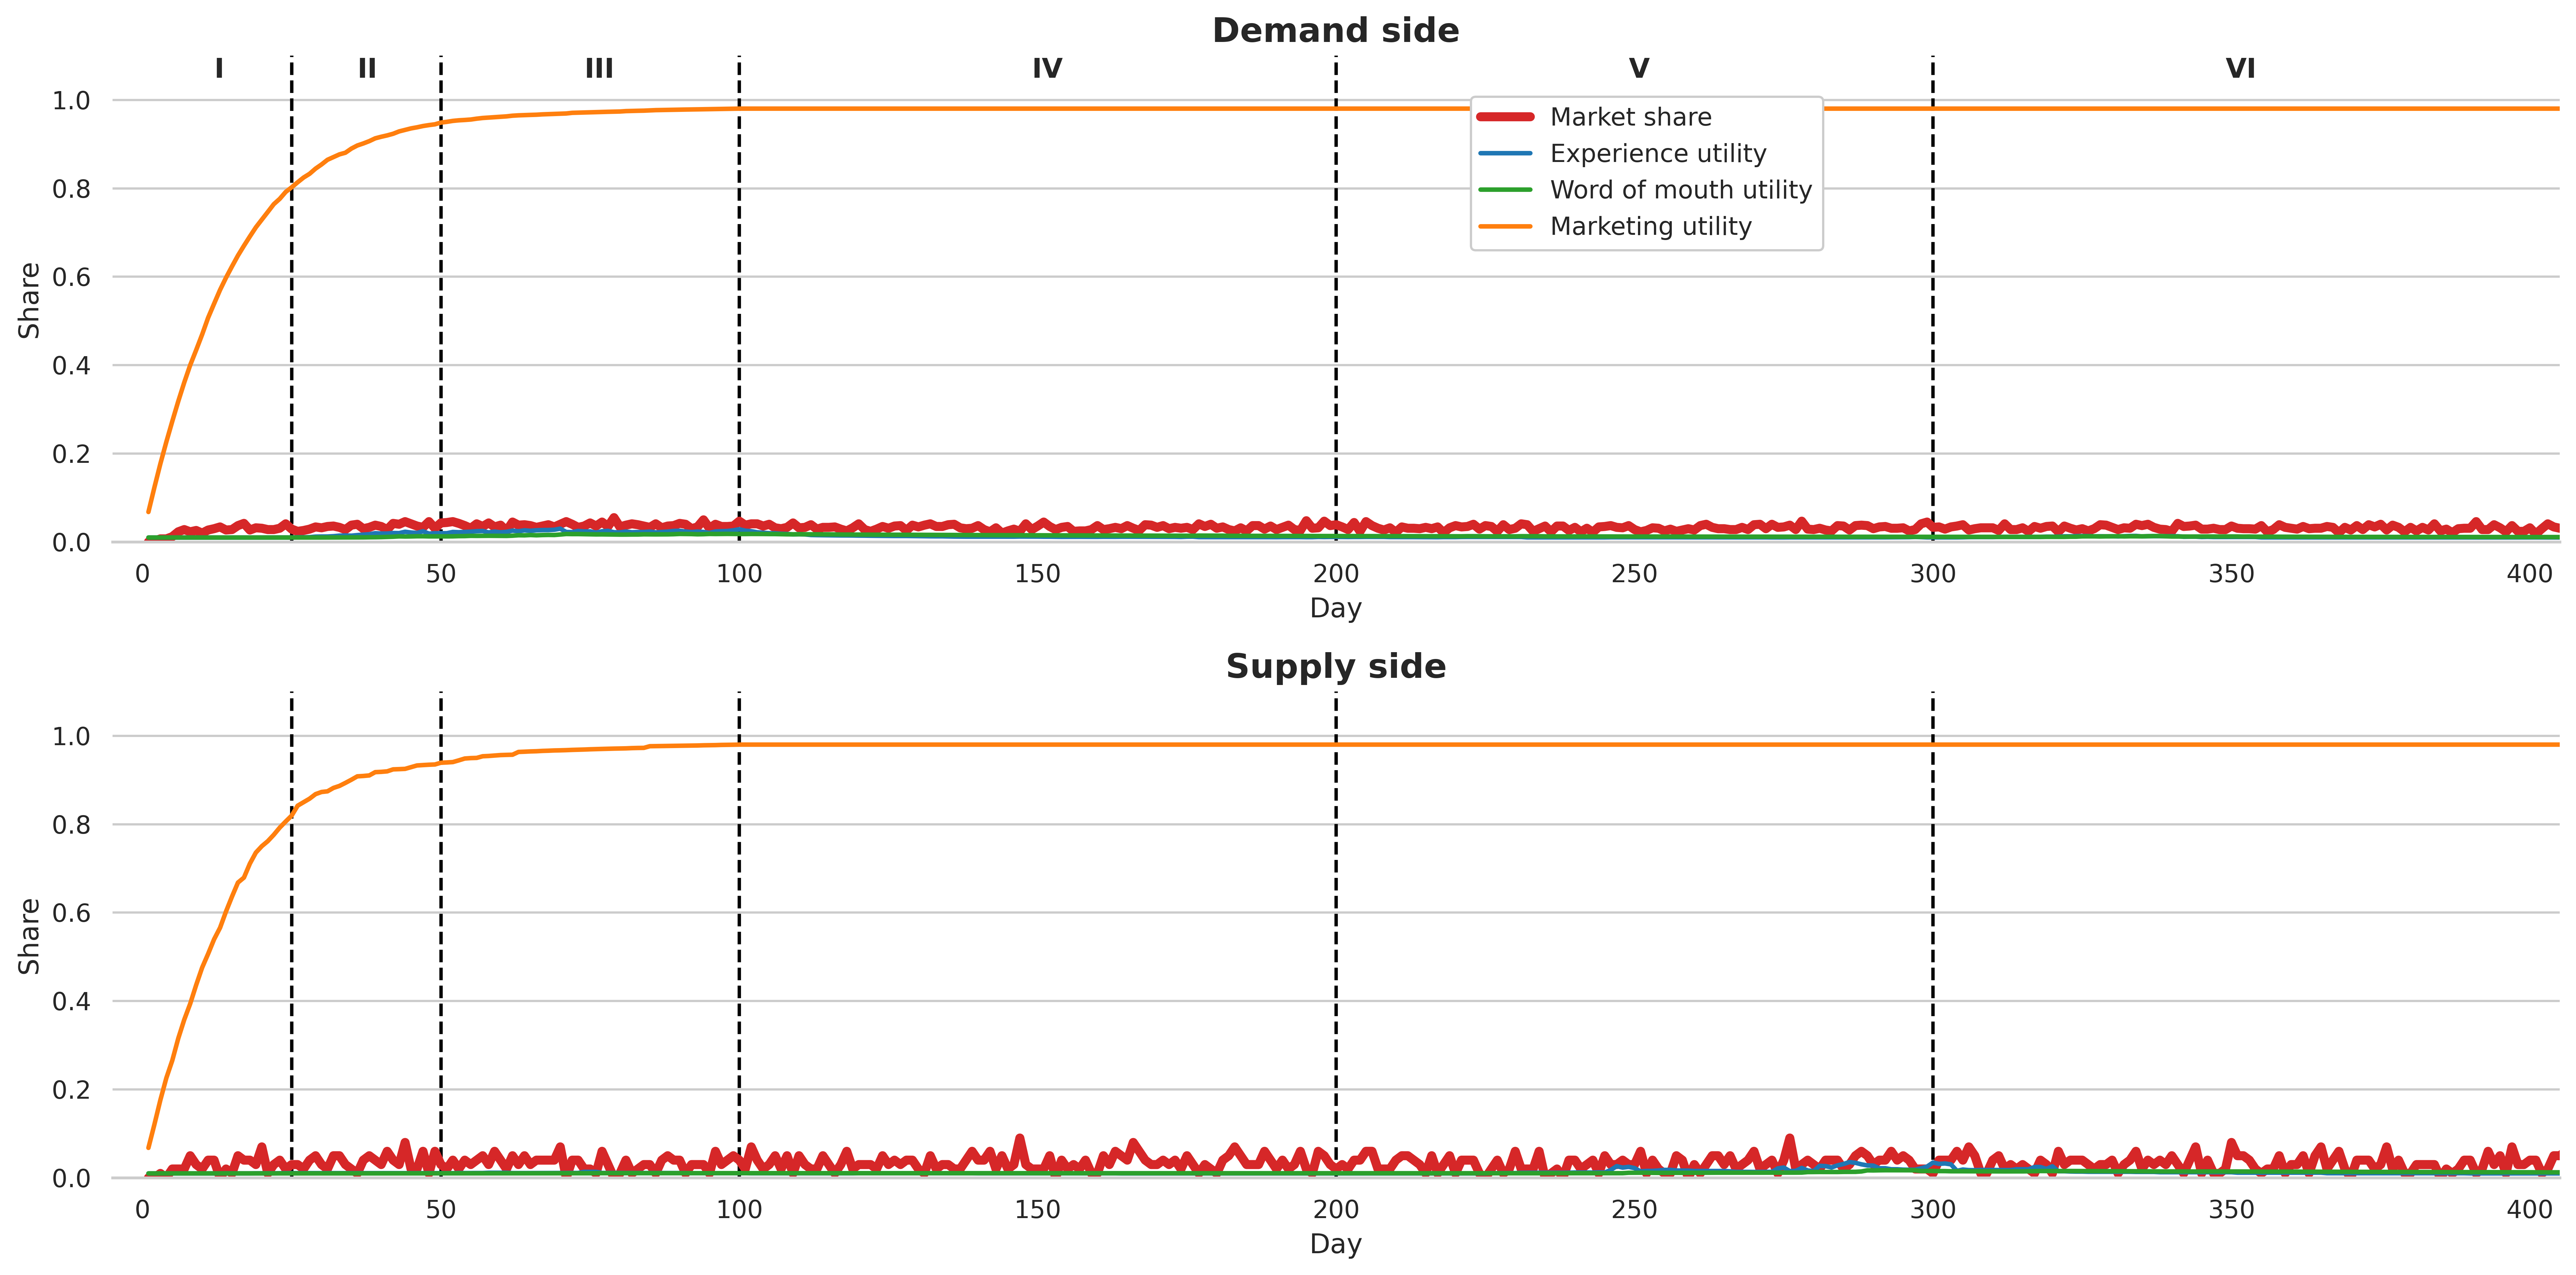

In [10]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.6))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

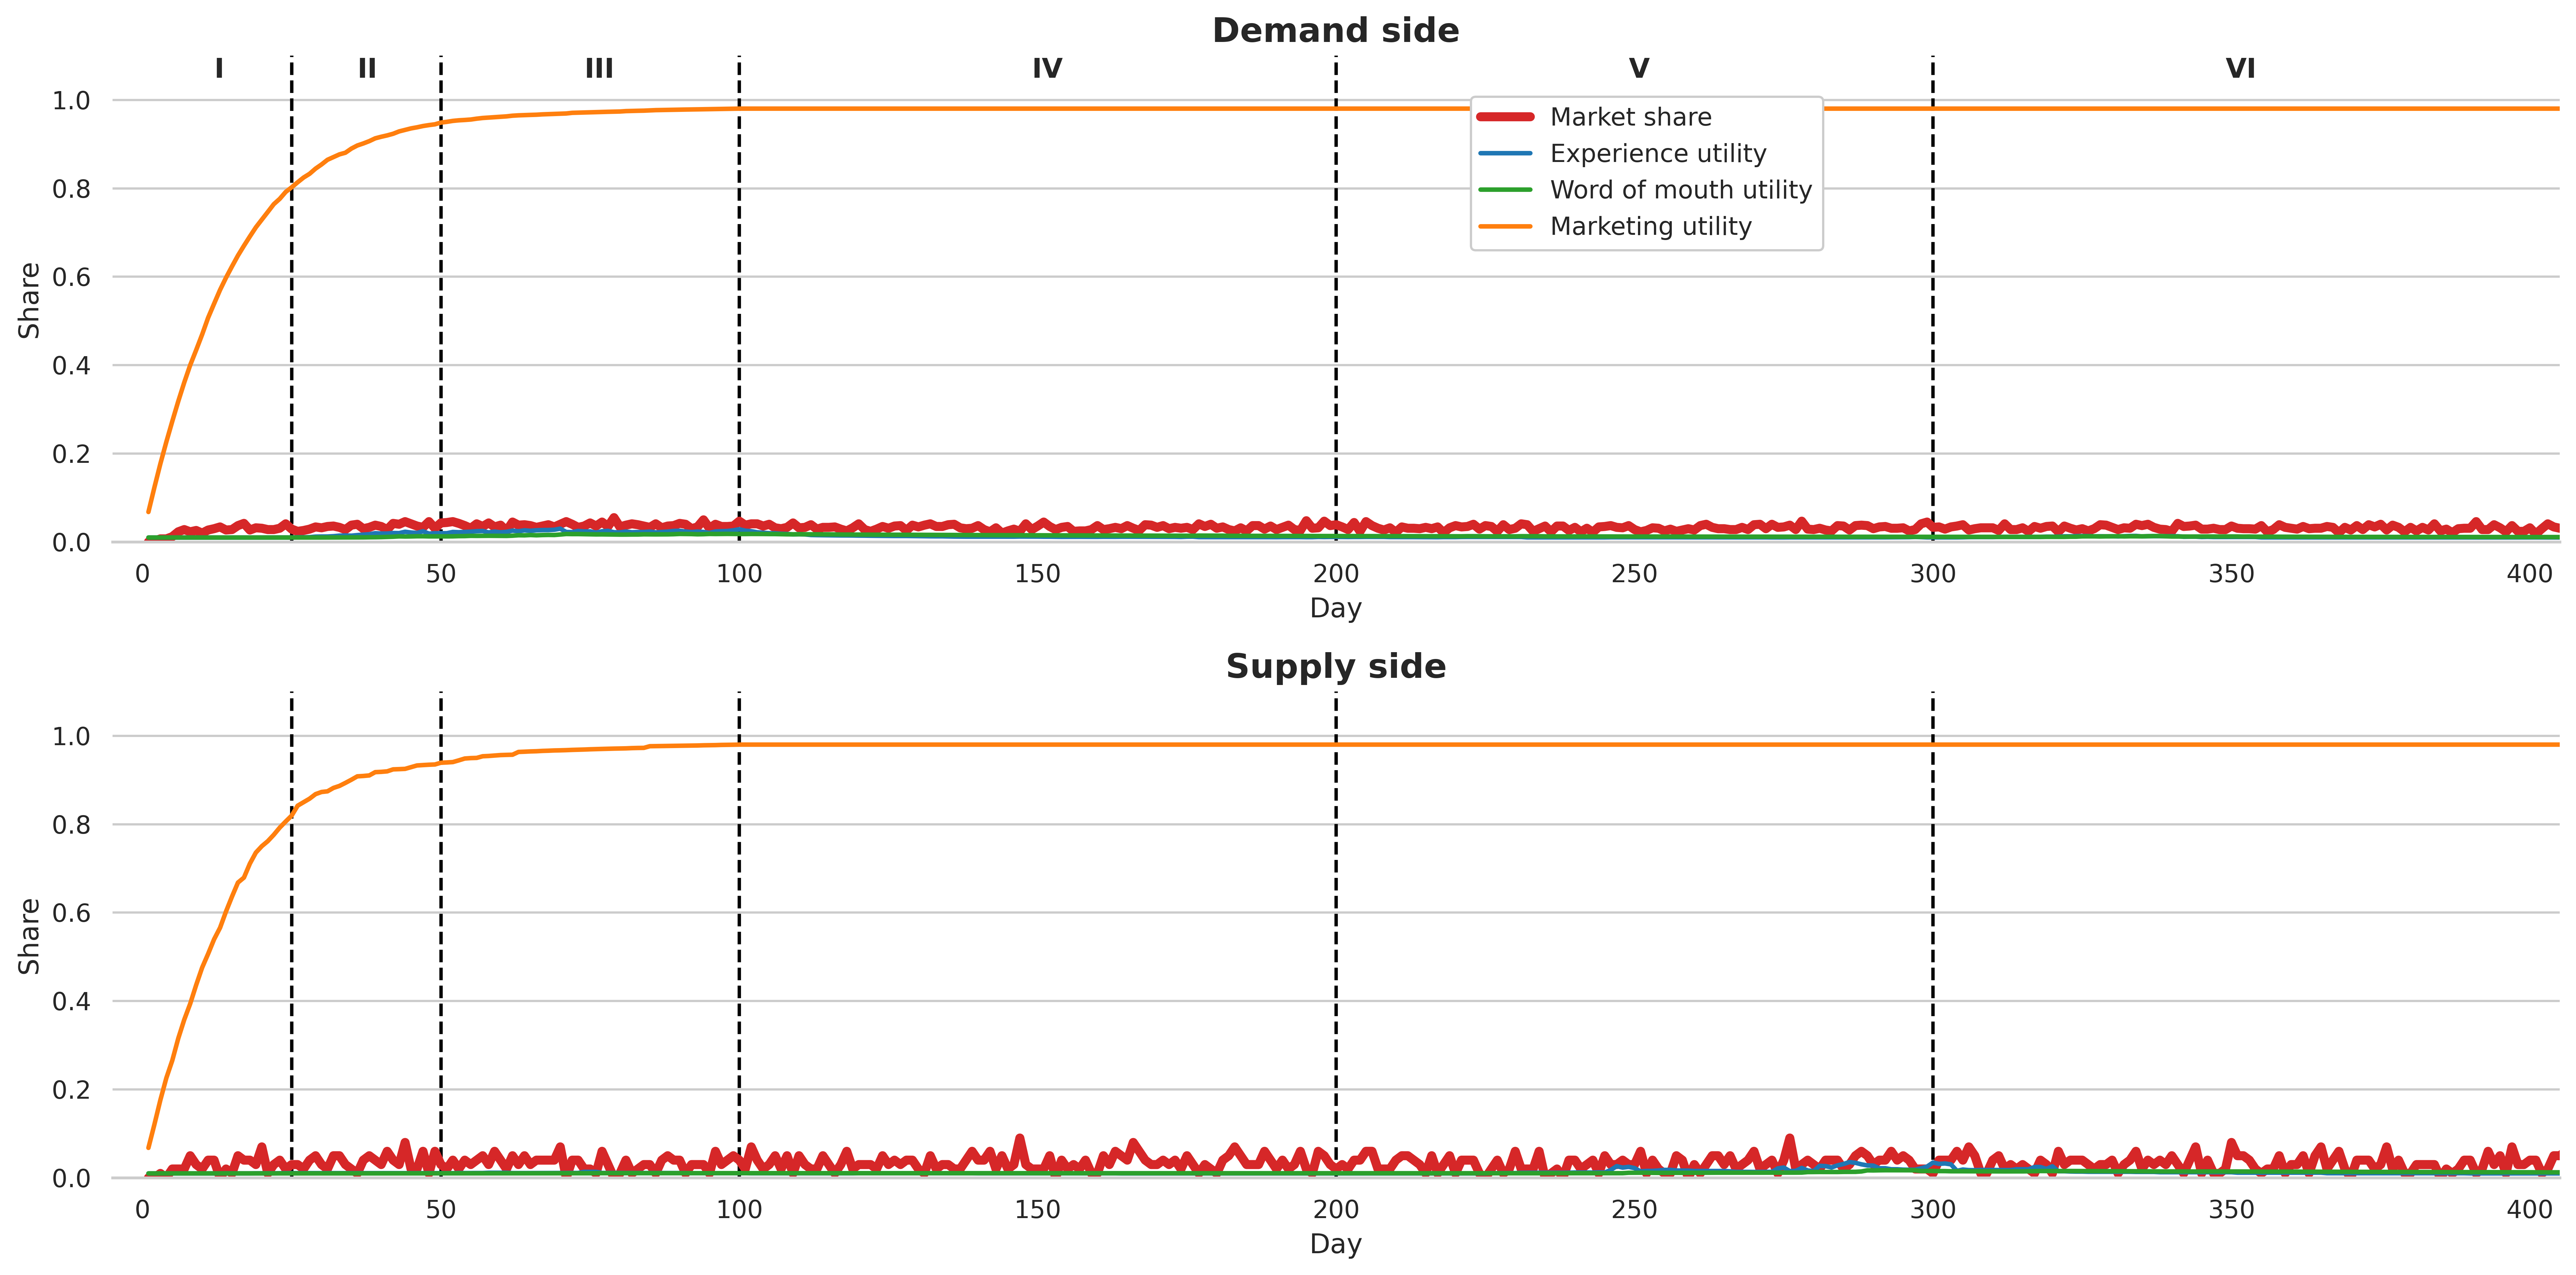

In [11]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.6))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

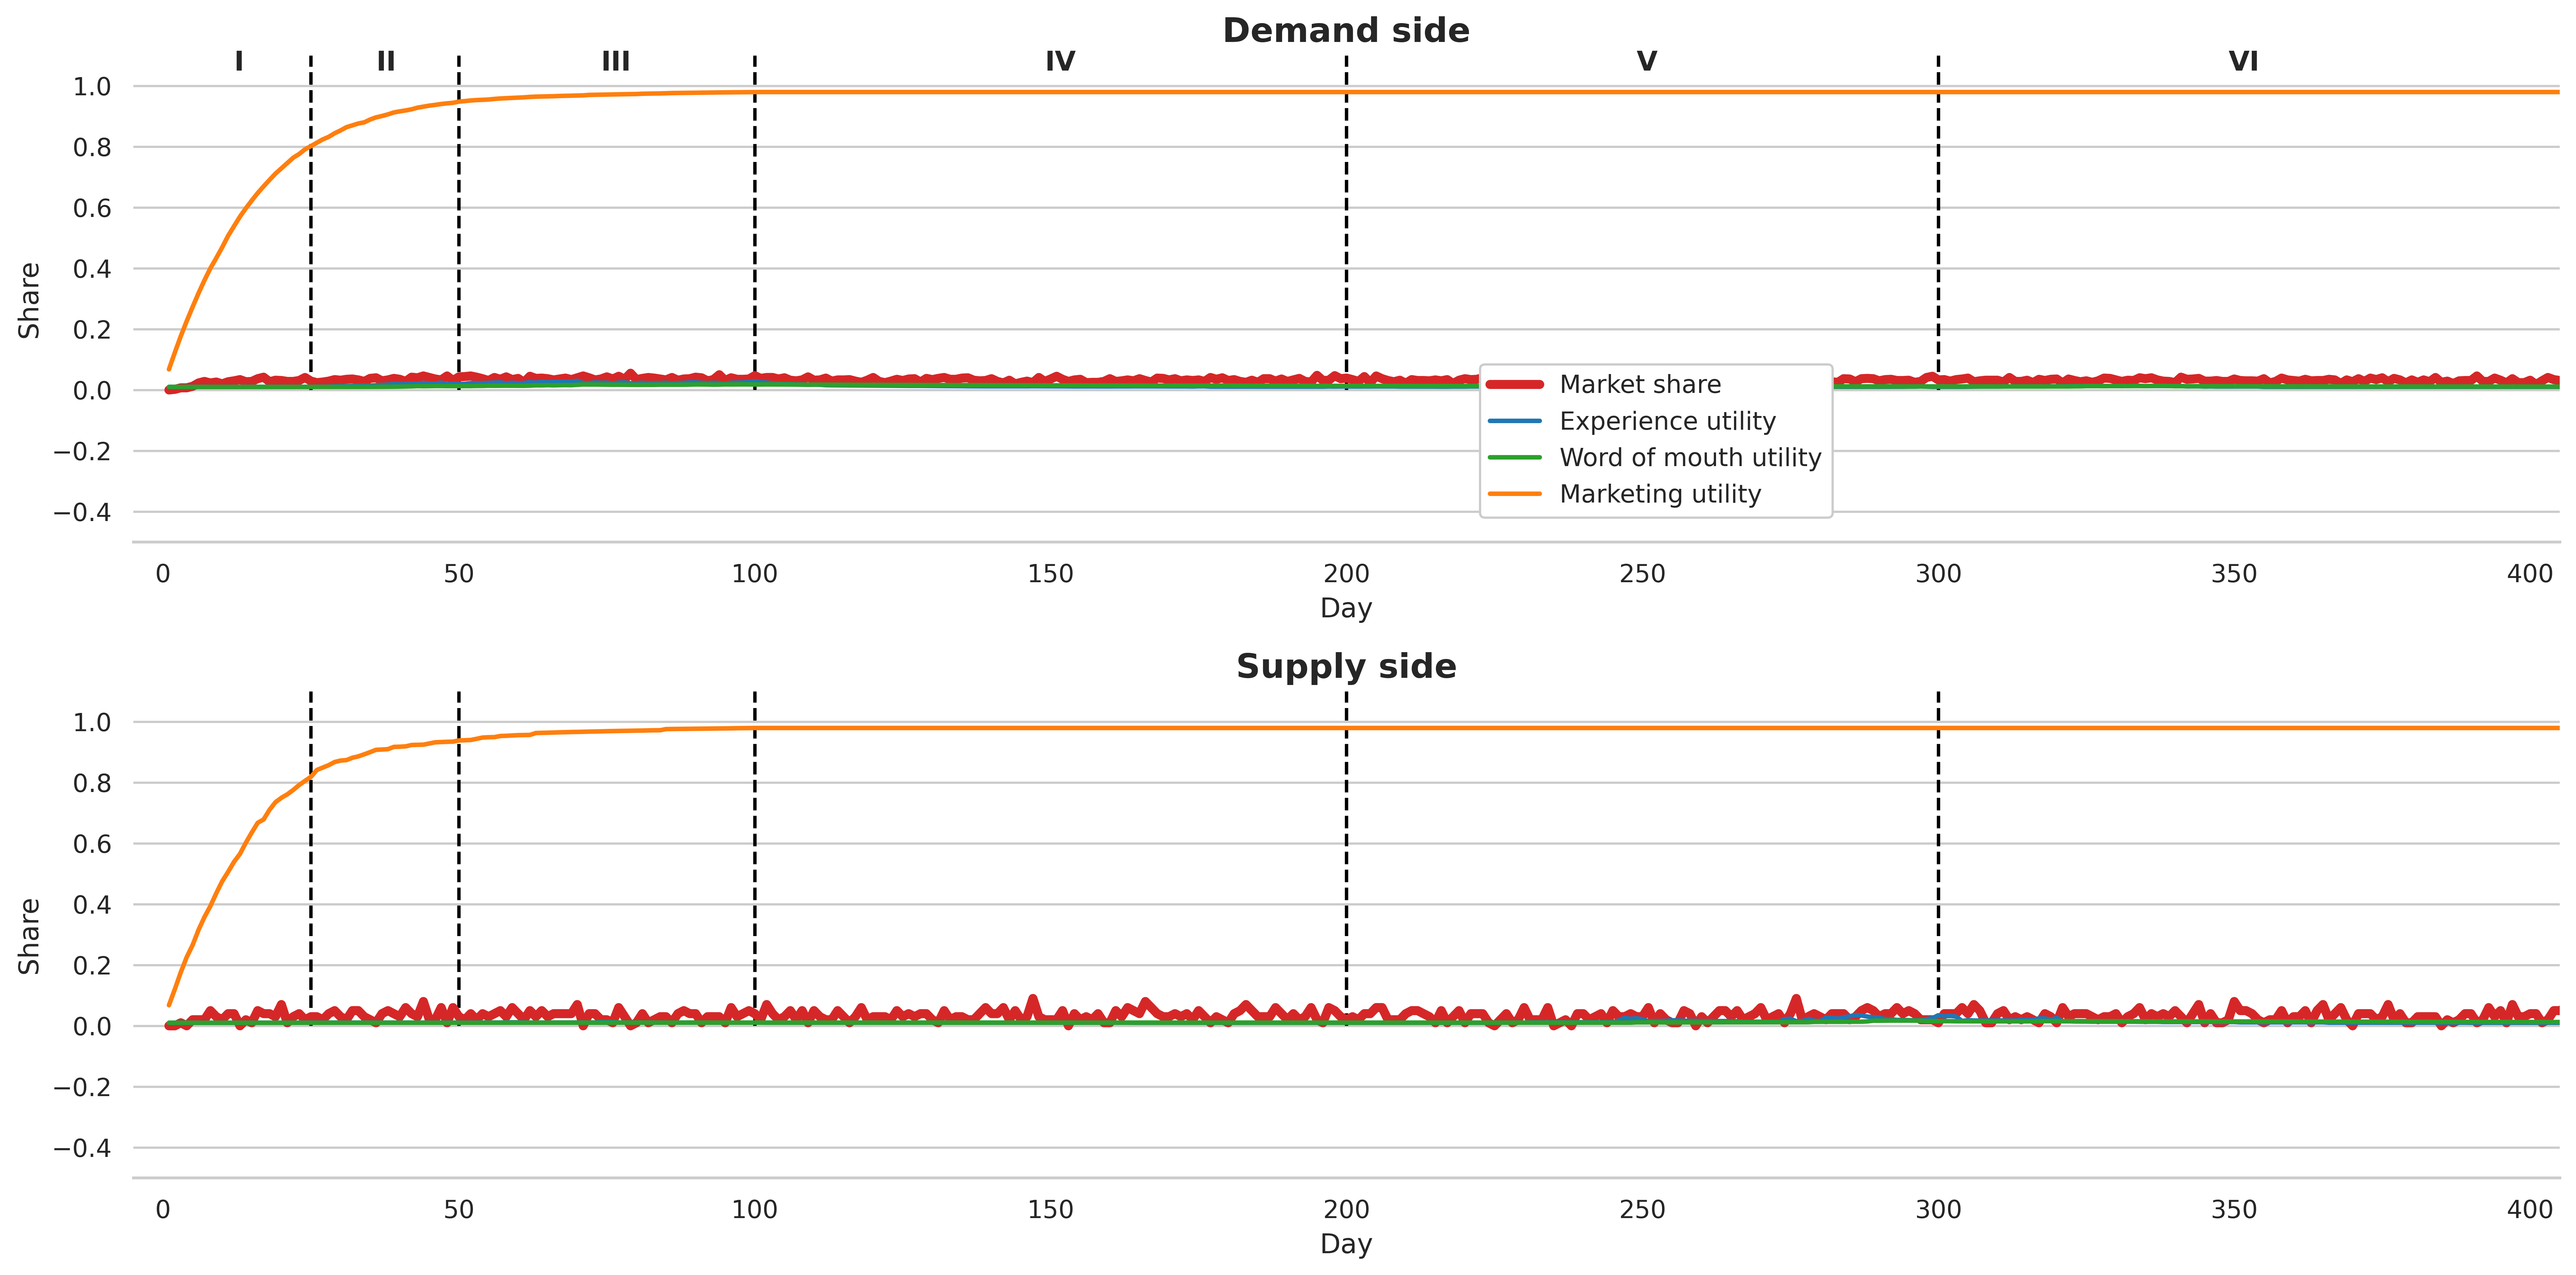

In [12]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(-0.5,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

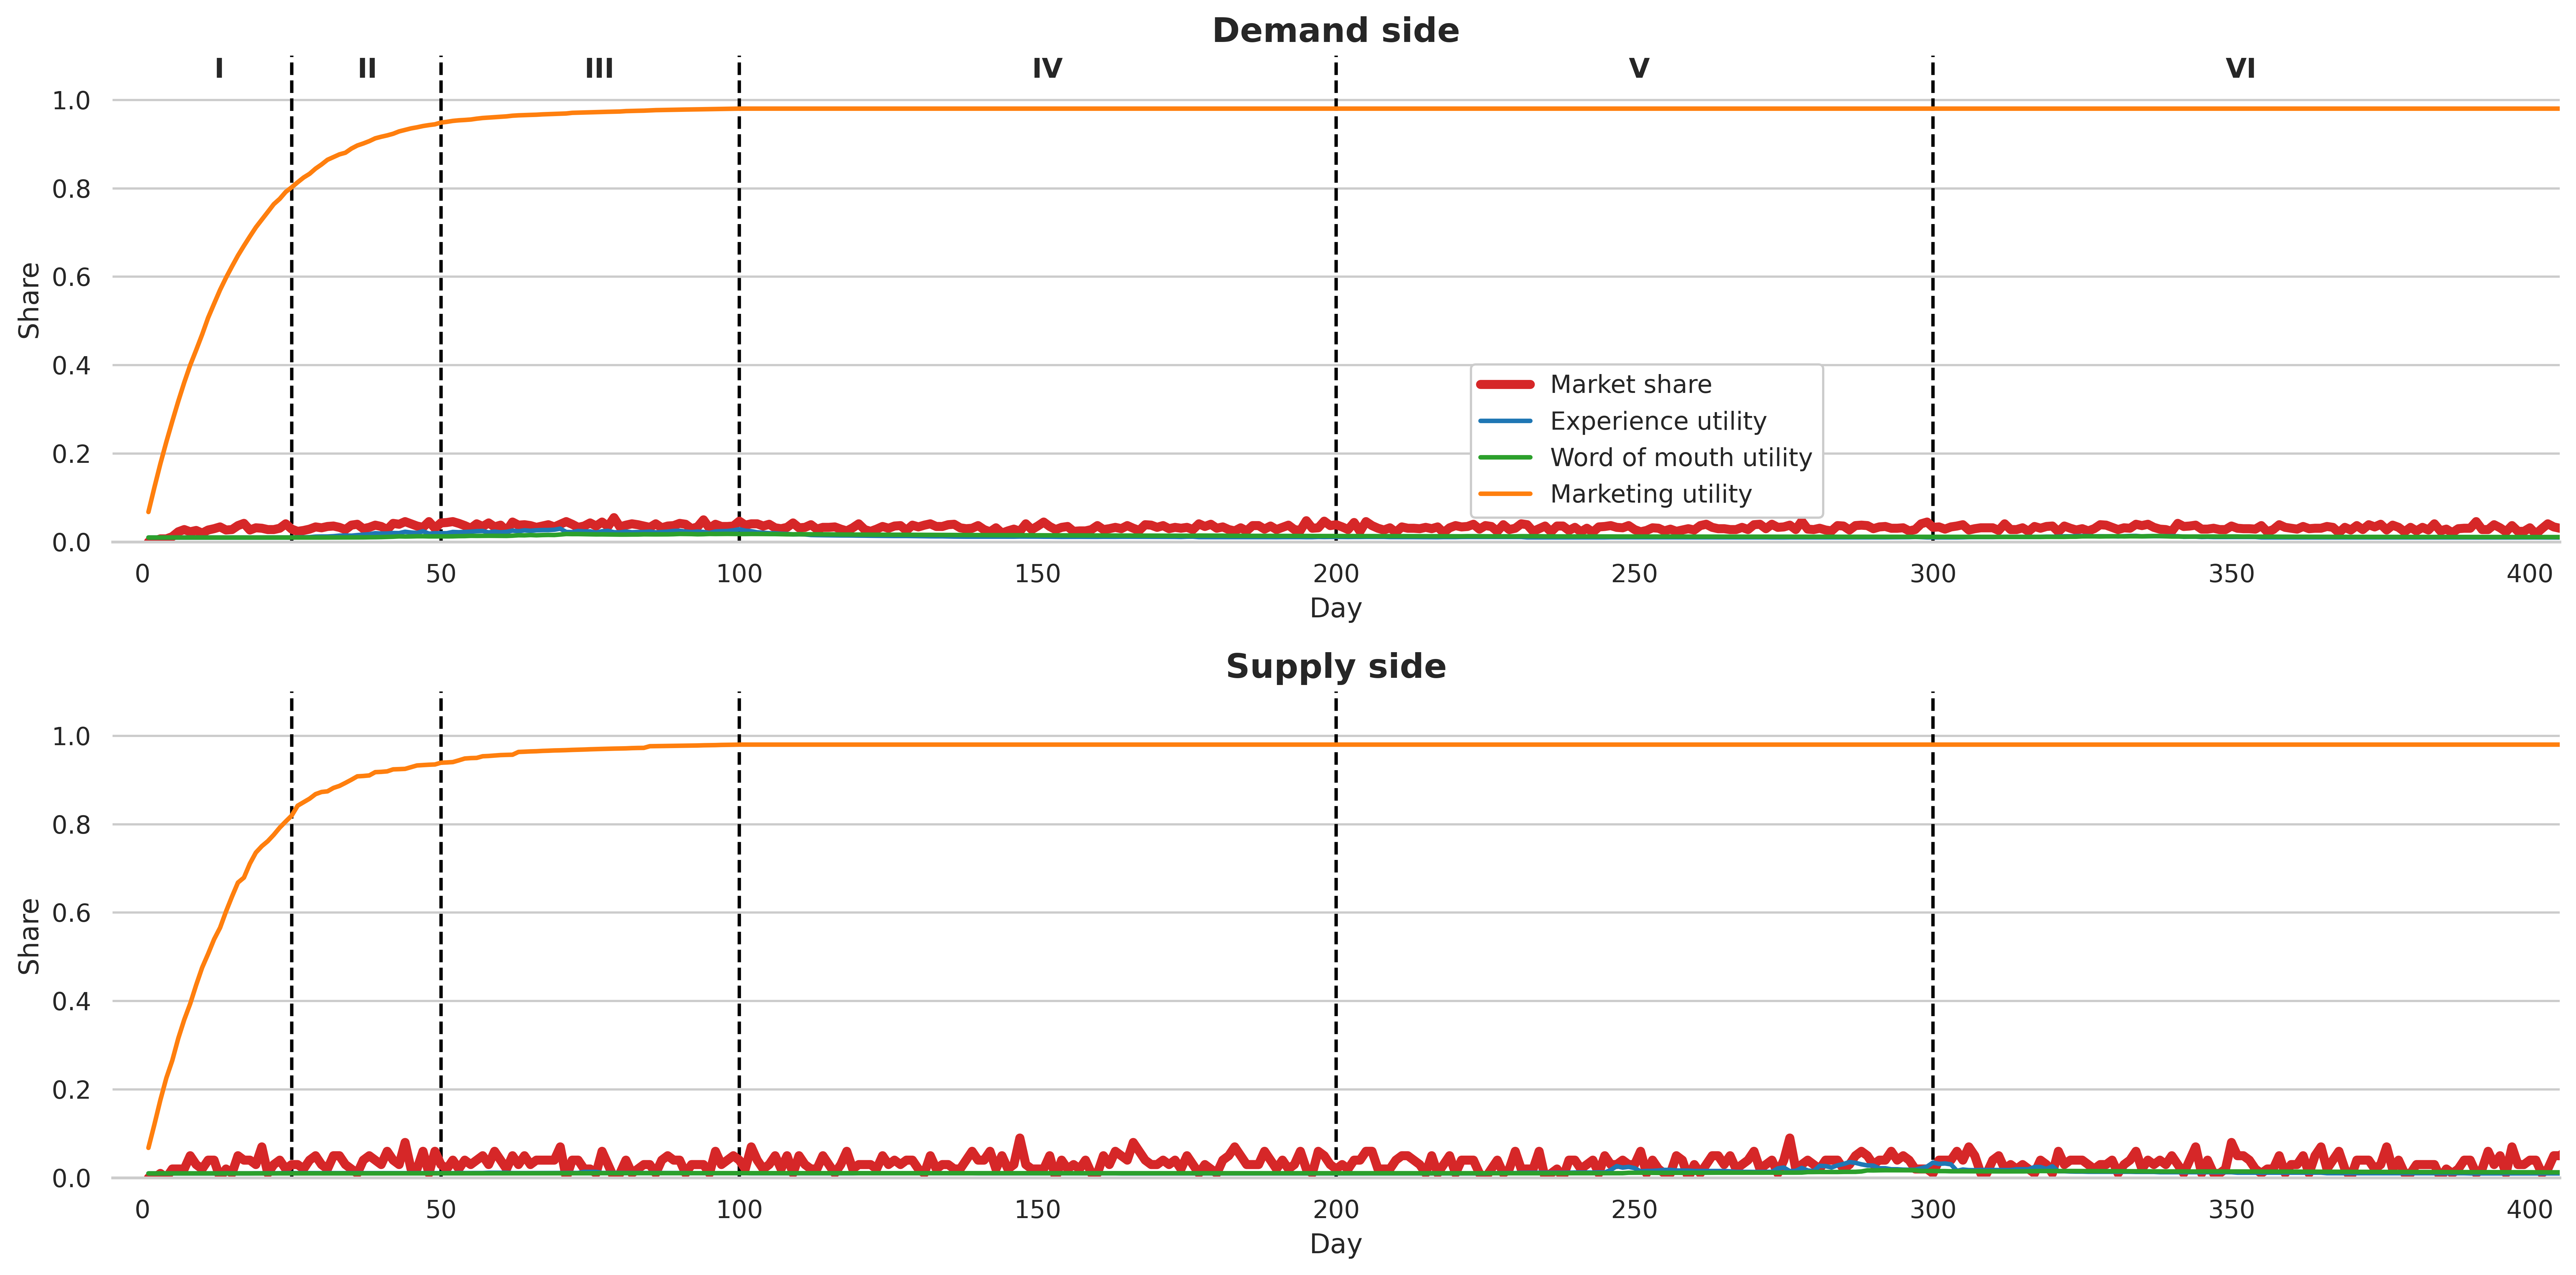

In [13]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

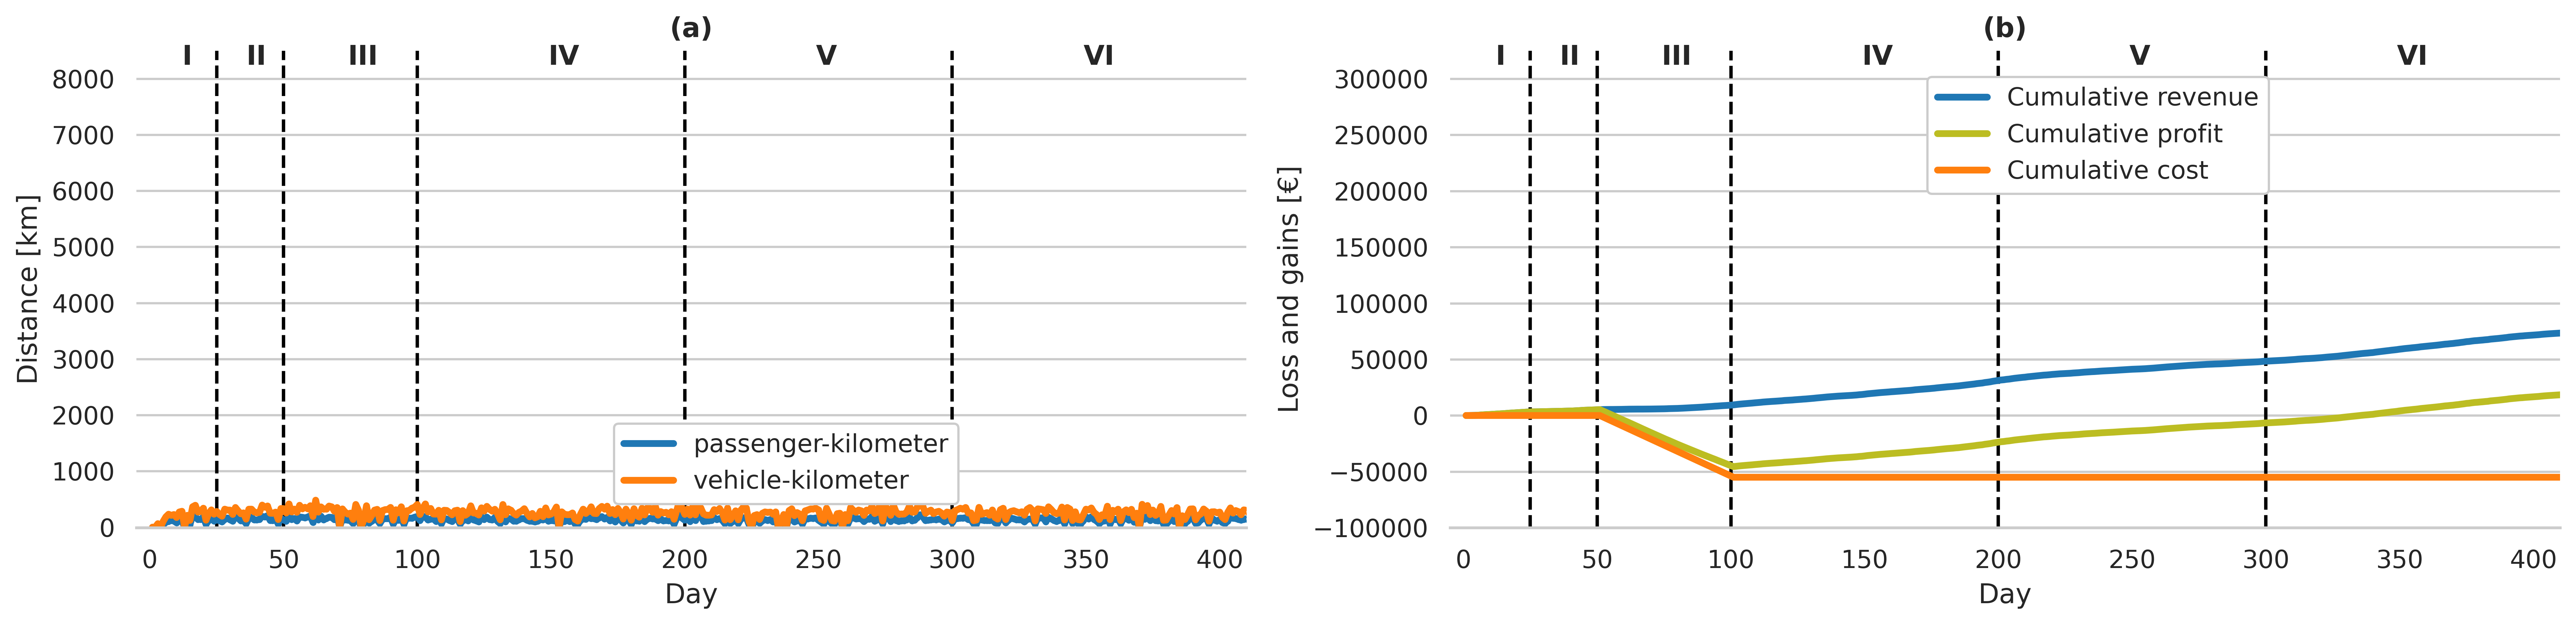

In [14]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.despine(left=True)

x = []
ypkm = []
yvkm = []

for d in range(0,sim.params.nD):
    df = sim.res[d].veh_exp
    df['pkm'] = df.DRIVING_DIST-df.PICKUP_DIST
    ypkm.append(df.pkm.sum())
    yvkm.append(df.DRIVING_DIST.sum())

x = [i for i in range(1,len(ypkm)+1)]

ypkms = ypkm#smooth(ypkm)
yvkms = yvkm#smooth(yvkm)
sns.lineplot(x=x, y=ypkms, lw=3, label = 'passenger-kilometer', ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yvkms, lw=3, label = 'vehicle-kilometer', color='C1', ax=ax[0])#, marker='o')
lines, labels = ax[0].get_legend_handles_labels()

sns.scatterplot(x=x, y=ypkm, s=10,label = 'passenger-kilometer',ax=ax[0])#, marker='o')
sns.scatterplot(x=x, y=yvkm, s=10,label = 'vehicle-kilometer', color='C1',ax=ax[0])#, marker='o')

ax[0].set(ylim=(-10,8500), xlim=(-5,410), xlabel='Day', ylabel='Distance [km]')
ax[0].legend(lines, labels ,framealpha=1, loc=(0.43,0.05))
ax[0].grid(axis='x')
ax[0].vlines([25, 50, 100, 200, 300], 0, 8500, linestyles='dashed', colors='black')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,8250),(36,8250),(74,8250),(149,8250),(249,8250),(349,8250)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
#-----------------------------------------------------------------------------------
x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_revenue.sum())#ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0',ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8',ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1',ax=ax[1])#, marker='o')

ax[1].grid(axis='x')
ax[1].vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax[1].set(xlim=(-5,410), ylim=(-100000,325000), xlabel='Day', ylabel='Loss and gains [€]')
ax[1].legend(framealpha=1, loc=(0.43,0.7))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax[1].annotate(value[i], xy =coords[i], fontweight='bold')
    

ax[0].set_title('(a)',fontweight='bold')
ax[1].set_title('(b)',fontweight='bold')


plt.tight_layout()
plt.savefig('Fig4.png')

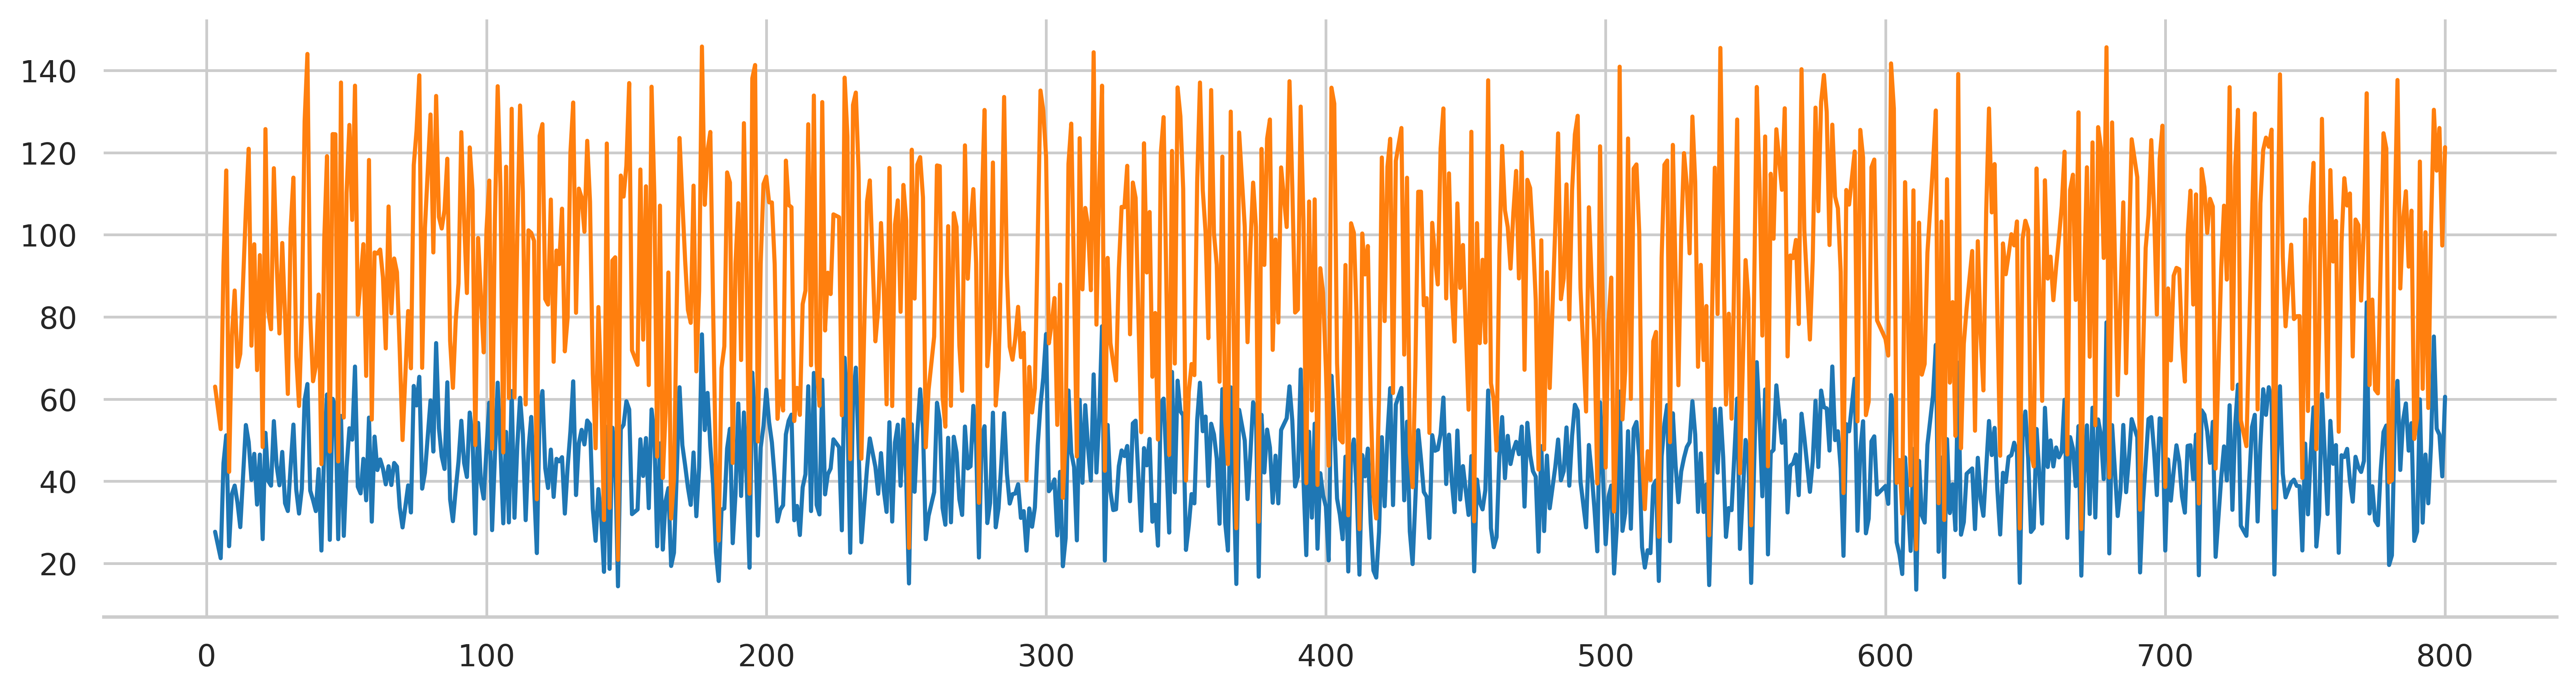

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypkm = []
yvkm = []

for d in range(0,sim.params.nD):
    df = sim.res[d].veh_exp
    df['pkm'] = df.DRIVING_DIST-df.PICKUP_DIST
    ypkm.append(df[df.OUT==False].pkm.mean())
    yvkm.append(df[df.OUT==False].DRIVING_DIST.mean())

x = [i for i in range(1,len(ypkm)+1)]

ypkms = ypkm#smooth(ypkm)
yvkms = yvkm#smooth(yvkm)

sns.lineplot(x=x, y=ypkms)
sns.lineplot(x=x, y=yvkms)

In [16]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

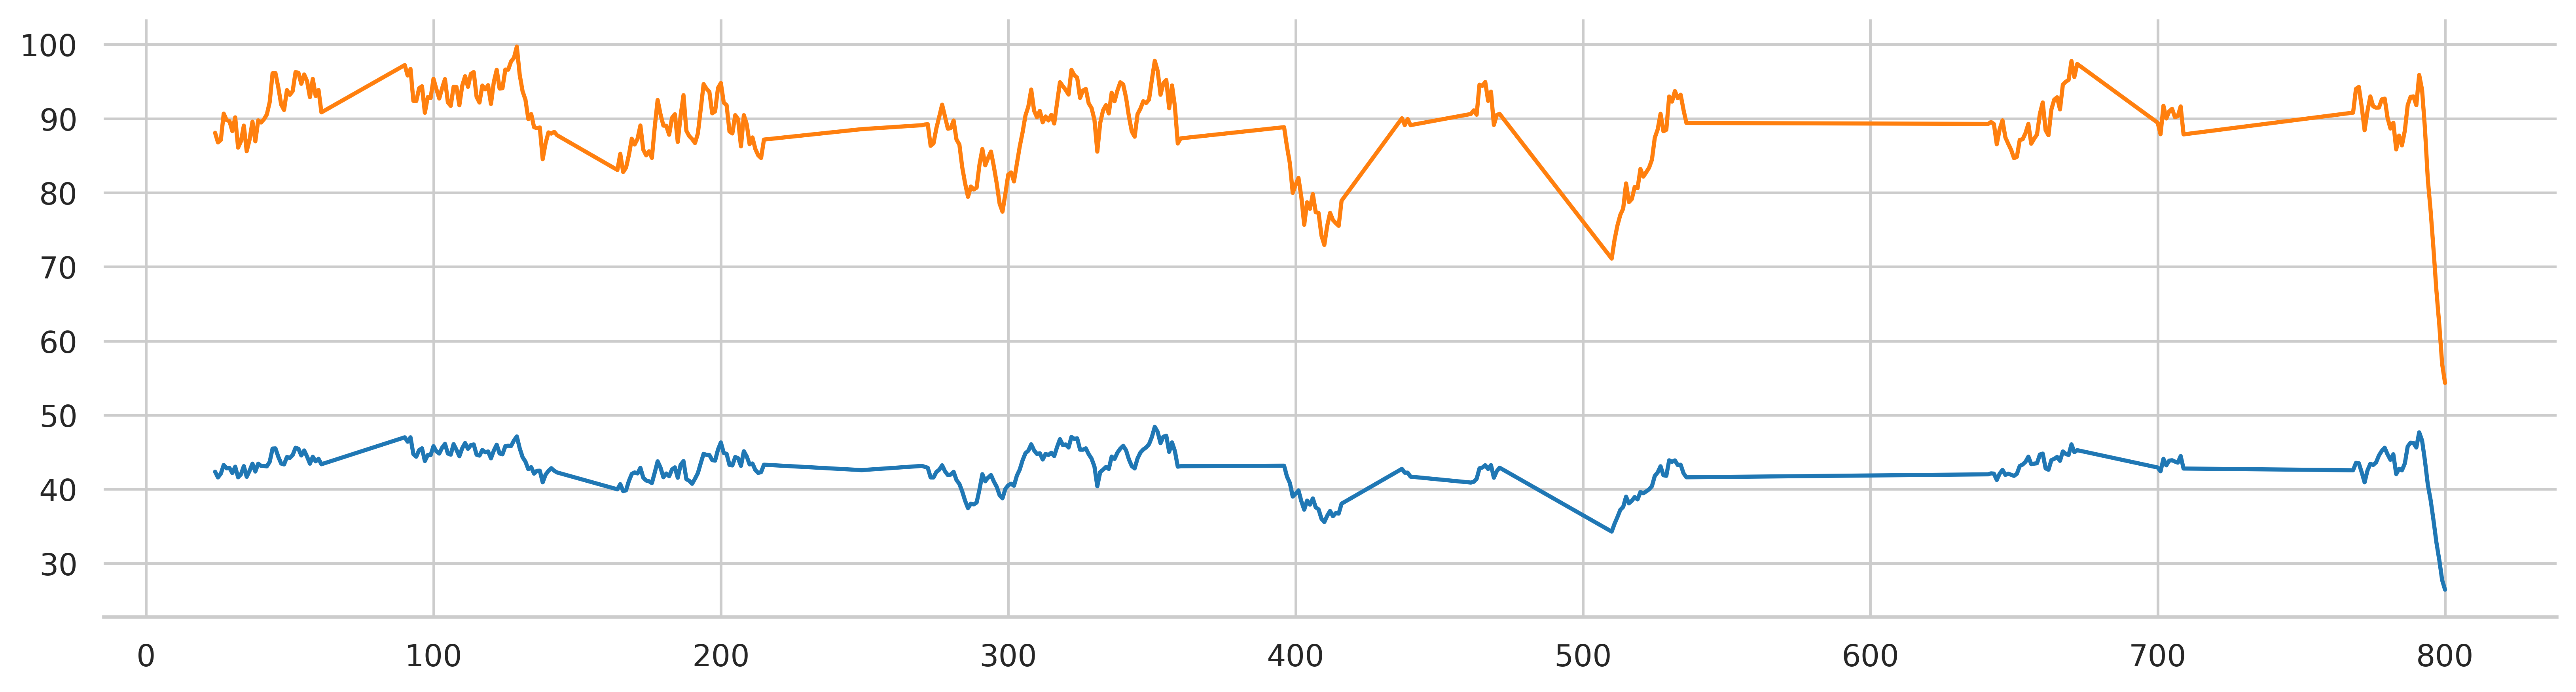

In [17]:
fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypkm = []
yvkm = []

for d in range(0,sim.params.nD):
    df = sim.res[d].veh_exp
    df['pkm'] = df.DRIVING_DIST-df.PICKUP_DIST
    ypkm.append(df[df.OUT==False].pkm.mean())
    yvkm.append(df[df.OUT==False].DRIVING_DIST.mean())

x = [i for i in range(1,len(ypkm)+1)]

ypkms = smooth(ypkm,20)
yvkms = smooth(yvkm,20)

sns.lineplot(x=x, y=ypkms)
sns.lineplot(x=x, y=yvkms)

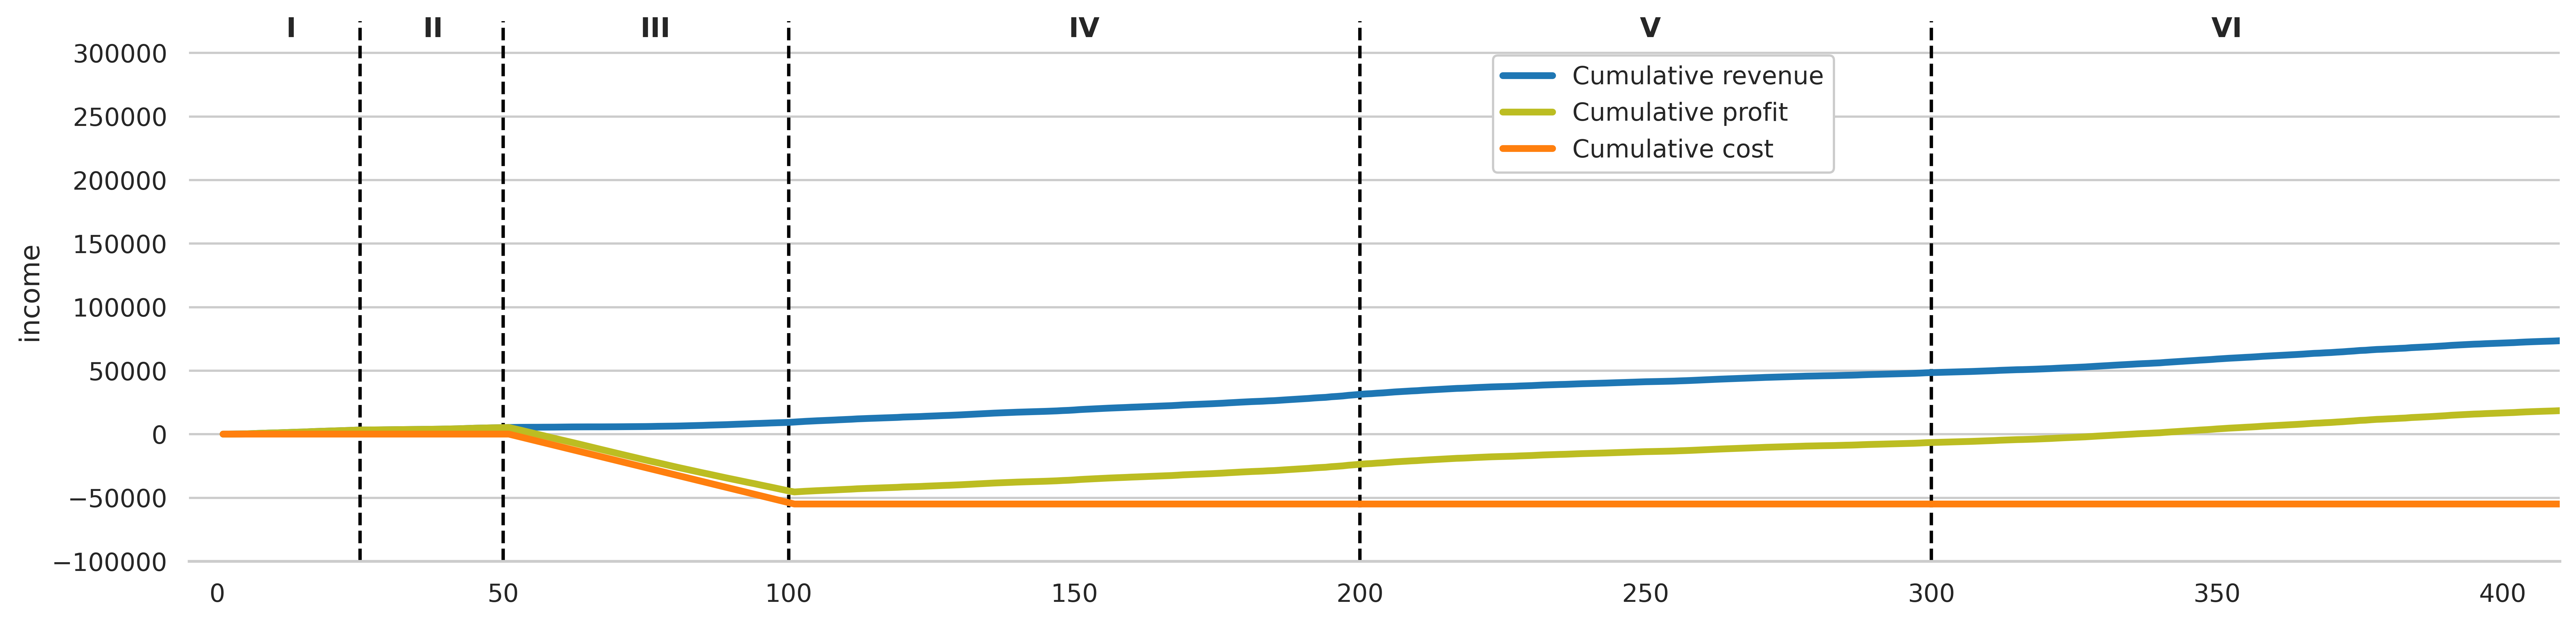

In [18]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_revenue.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')


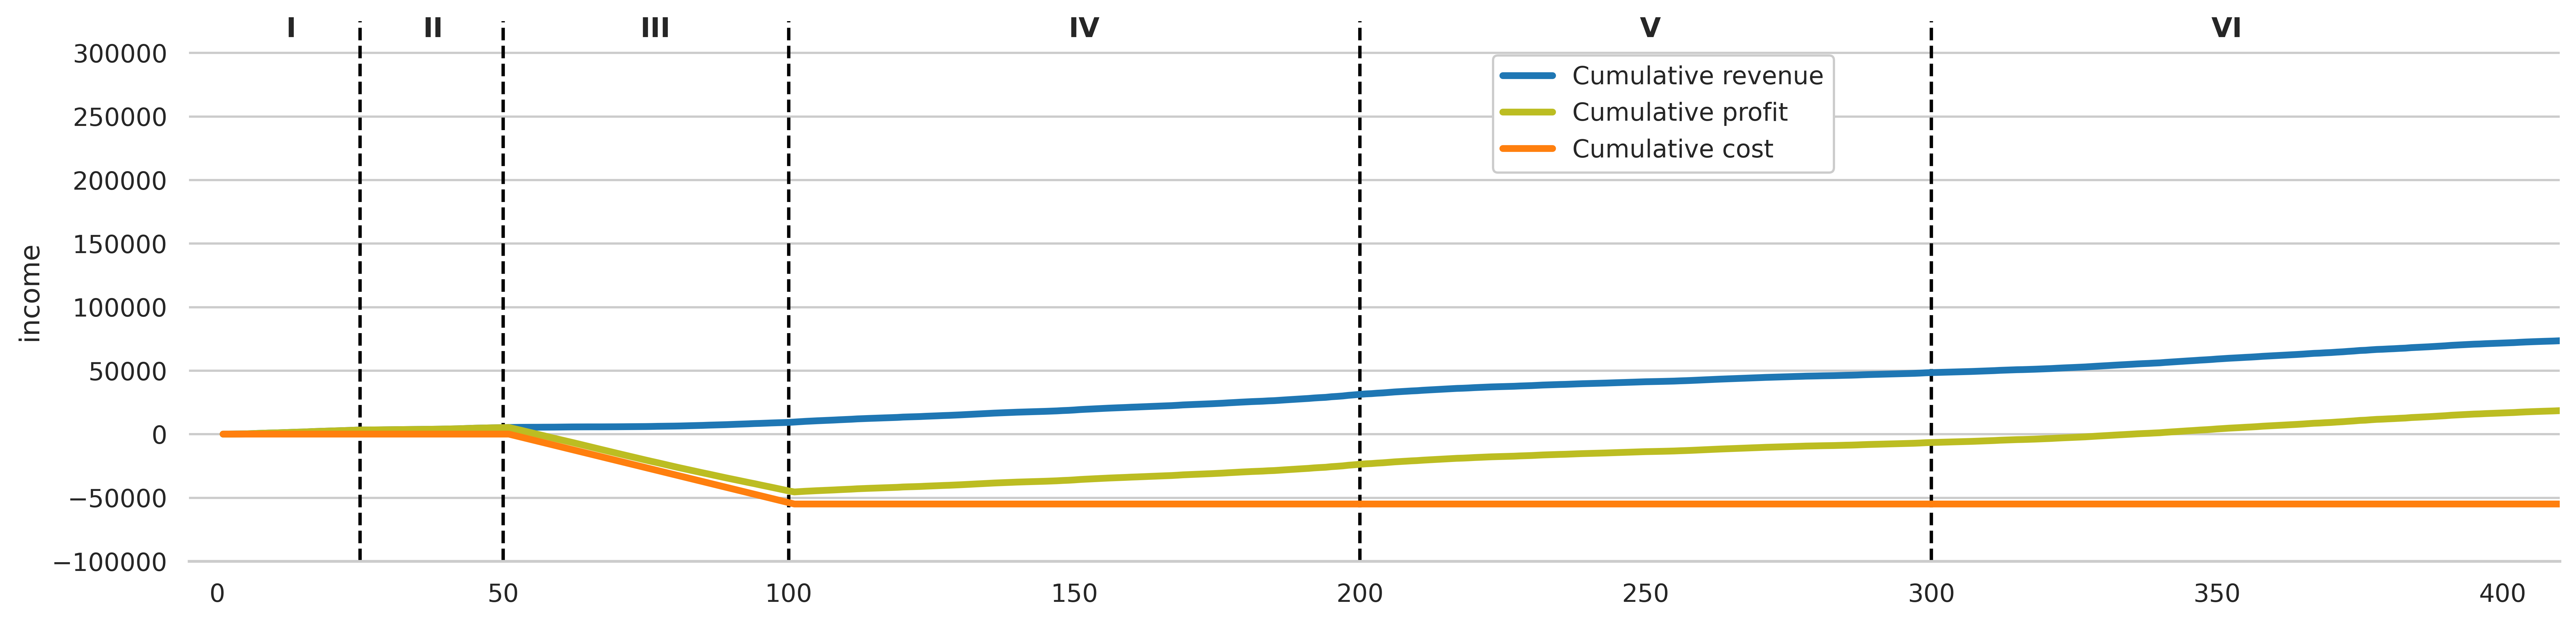

In [19]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_revenue.sum())#ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

NameError: ignored

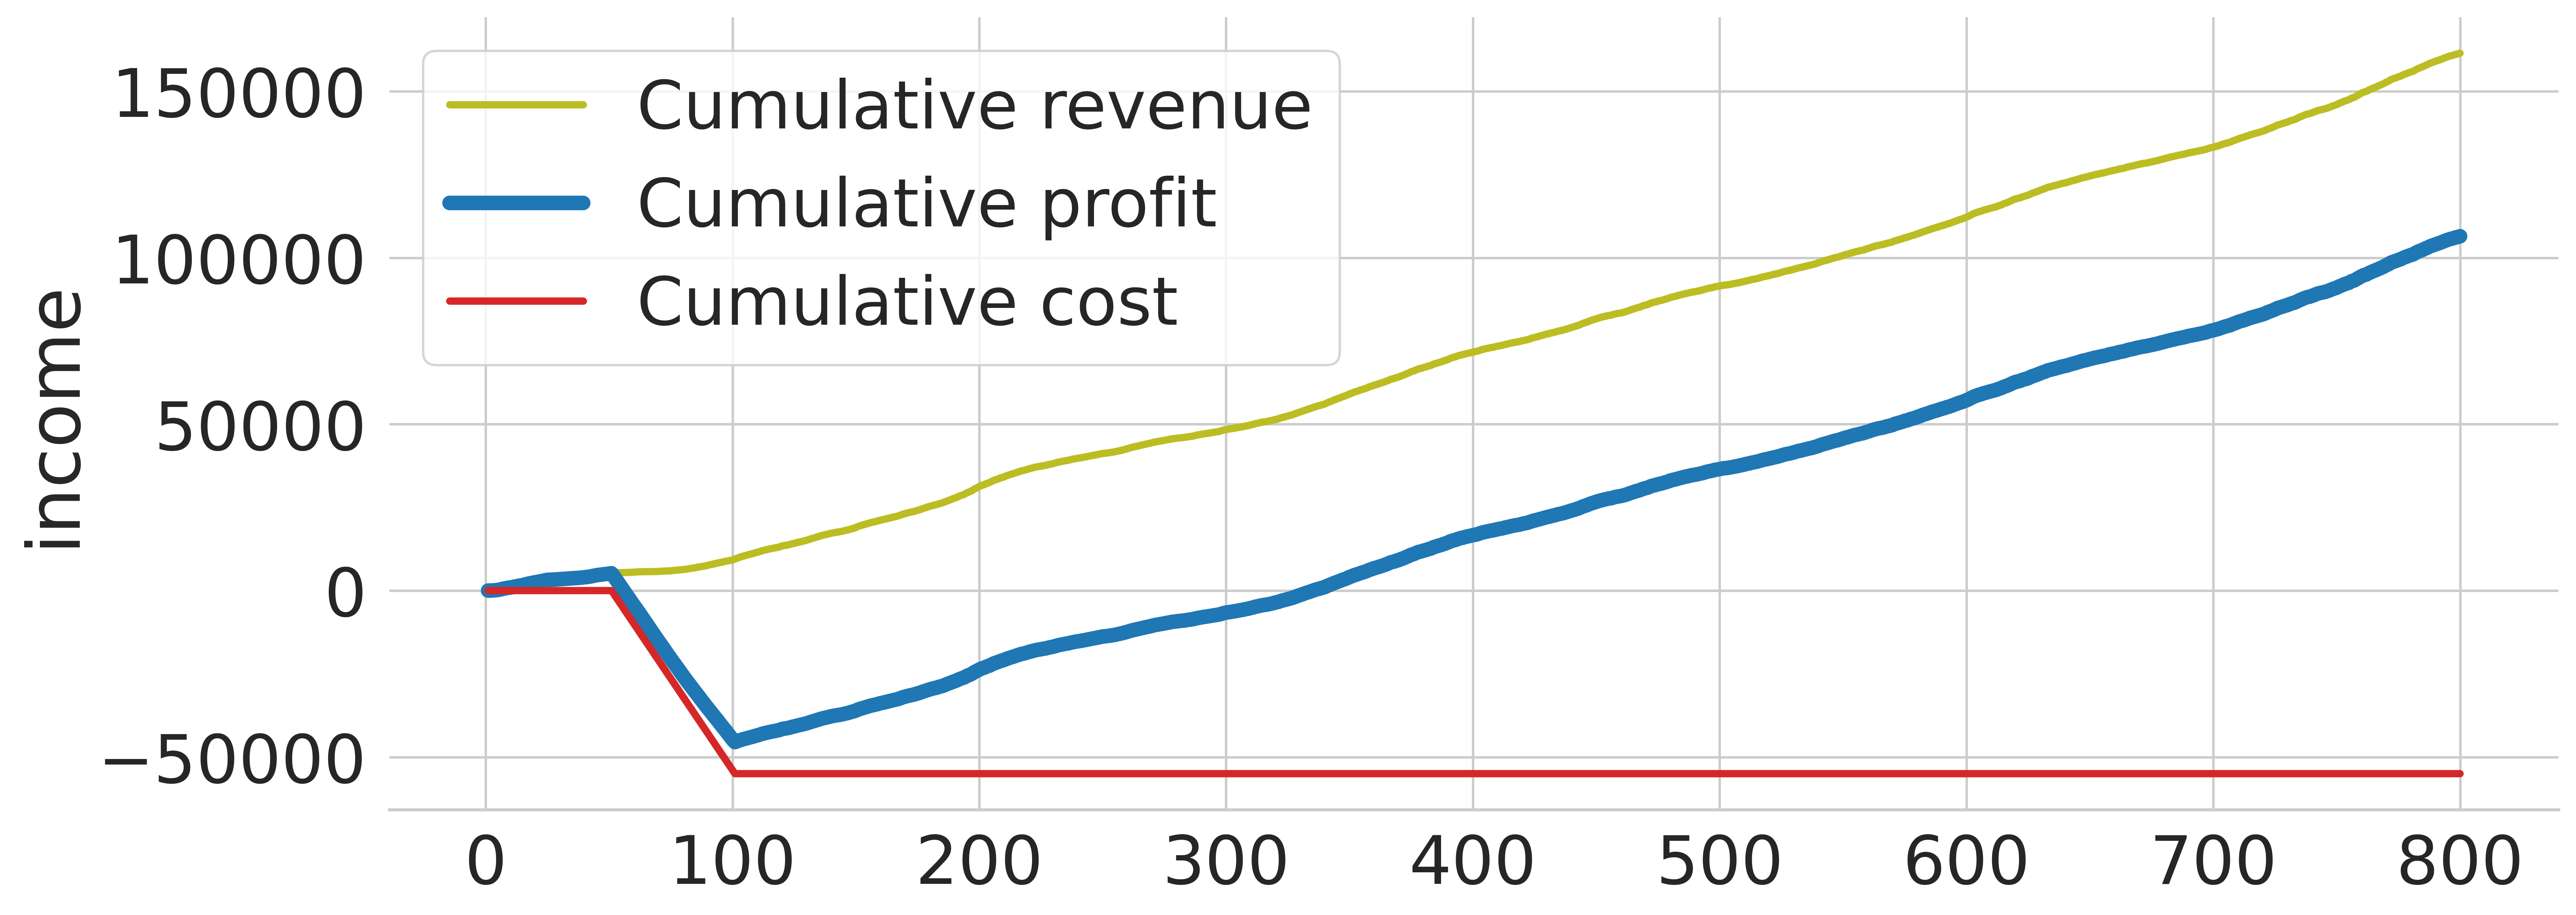

In [20]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,6))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_revenue.sum())#ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C8')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=6, label = 'Cumulative profit', color='C0')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C3')#, marker='o')
sns.lineplot(x=x, y=z, lw=6, label = 'Cumulative profit', color='C9')#, marker='o')
ax.lines[3].set_linestyle("--")

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-150000,325000))
ax.legend(framealpha=1, loc=(0.3,0.45), fontsize=20)
ax.set(xlabel='Day', ylabel='Loss and gains [€]')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
plt.savefig('Fig_aamas_last.png')